## When is College Worth it: An In-depth Data Analysis of Post University Wages. 

Group members: \
Zhenzhao Tu (UID u1315097)\
Fernando Turcios (UID U0935172) \
Lincoln Sand (UID u1358804)


Emails: tuzhenzhao@gmail.com, Fernandoturcios222@gmail.com and sandlincoln@gmail.com

# Project description: Background and Motivation

There are many paths that a freshly graduated high school student faces when deciding to go to university. The two most important decisions that a soon to be university students must decide before they take any classes are which major they should take and which university they should attend. We know there there are some preconceived notions about some university majors doing better than others (from a salary perspective), but is there any truth to those notions? We also know that people ultimately want to major in what makes them happy, but surely they have heard how well/poorly their fields get paid. Everyone wants to be able to get high value for their major, and we wish to provide some insight into picking a major and university to attend. 

Our group is aware of how stressful this decision process is for going to university and deciding what school and major to attend. There are many things to consider, and the goal of this project is to help incoming college students be more informed before choosing a major/university to get the best out of their college degree. 


## Project Objectives

The main objective of the project is to determine which majors fare better in post-graduate wages and if certain university regions or types provide students with a better outlook on post-graduate wages. To do this, we looked at data provided by The Wall Street Journal, where they collected 1.2 million people in the United States with only a bachelor's degree.  



## Data Description

The data we will be using is provided by The Wall Street Journal on their website: http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html.
The data is from a year-long survey of 1.2 million people with only bachelor's degrees. The survey breaks the data down into 3 major sections. The first section is Salaries for colleges by type. This section consists of a 269 rows (different schools) and 7 variables (1 school type and 6 salary variables). The next section Salaries for colleges by region is similar to the previous section with 320 rows and 7 variables (1 region variable and 6 salary variables). The third section is Degrees that pay you back, it contains 50 rows for different majors and 7 variables (6 about salary and 1 about growth). These three sections are the csv files attached. They were required to be scraped from the website by downloading the html site and running code to collect the survey results. The Wall street journal website had little info on their rules for scraping. The scrapping was tedious with the first page, but once it was all sorted out, the overall code was able to be copied and pasted for the other two sections with minor changes. The code overall is pretty much clean but there were only a few missing values on some columns (primarily 2 of the sections the 3rd section has no missing values). 

Due to the amount of time it takes to run the scraping code, we have attached it on a seperate file to be run seperatly to produce the 3 csv files. The file name for the scraped code is "Project_scrapping". We will just import the csv files that were created by the scrapping code. 



## Ethical Data Concerns (EDA) 

There are a few things to consider about the data we are using. The biggest concern is that there is little detail on how the data was collected. We are relying on the reputation of The Wall Street Journal. We dont know if the data was collected using appropriate methods (Simple Random Sample, the wording of survey....). Without any details on how the survey was conducted we can not be sure that our data came from a proccess of good scientific standadrd. Another concern is how we handle our categorical data. For example the section that contains the college type can contain 1 of 5 diffrent opetions (Califonia, Western, Midestern, Southern, Northeastern). To try and analize this we might convert those options into a number system to do proper anaylsis. When finalizing our results, we must be aware that they rely on the strength of the survey conducted and the reputation of The Wall Street Journal and trust that the overall process was done with high scientific standards. 

## Package Import

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import math
import statistics as st

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

from kmodes.kmodes import KModes

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

## Data Exploration

First we import the datasets that were scraped for the team to use:

Datasets: 

1) Majors 

2) Universities sorted by school region 

3) Universties sorted by school type 

We will display the heads of the three datasets 

In [2]:
#Importing scraped dataset sorted by Major
major = pd.read_csv("Project_Major_dataset.csv")
major.rename(columns = {'Unnamed: 0':'Major'}, inplace = True)
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [3]:
#Importing scraped dataset sorted by school and by region 
df_region = pd.read_csv("Project_school_dataset.csv")
df_region.rename(columns = {'Unnamed: 0':'University'}, inplace = True)
df_region.head()

,University,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [4]:
#Importing scraped dataset sorted by school and by schoool type 
df_type = pd.read_csv("Project_school_type_dataset.csv")
df_type.rename(columns = {'Unnamed: 0':'University'}, inplace = True)
df_type.head()


,University,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


# Exploratory Analysis: By Major 
This next section we will be exploring the dataset that is sorted by University Major (we will focus on the other two datasets separately later in the report) 




In [5]:
#Descriptive Statistics 
#Adjusting the Major dataframe name (Code was written seperatly)
df_Major = major
print(df_Major.describe())
print(df_Major.info())


       Starting Median Salary  Mid-Career Median Salary  \
count               50.000000                  50.00000   
mean             44310.000000               74786.00000   
std               9360.866217               16088.40386   
min              34000.000000               52000.00000   
25%              37050.000000               60825.00000   
50%              40850.000000               72000.00000   
75%              49875.000000               88750.00000   
max              74300.000000              107000.00000   

       Percent change from Starting to Mid-Career Salary  \
count                                          50.000000   
mean                                           69.274000   
std                                            17.909908   
min                                            23.400000   
25%                                            59.125000   
50%                                            67.800000   
75%                                            8

We see that the dataset sorted by Major is made up of 7 different salary columns (five columns for Mid-Career Salary, one starting salary, and one about the percent change from starting salary to mid-career).

There are 50 different Majors in this data (no missing data values).

From the descriptive statistics info provided, we see the standard deviation for starting salary is not as spread (when compared to the mid-career median salary). When we look at the 10% percentile mid-career median salary we see that the mean is less than the starting median salary. As we begin to go up in percentile in the mid-career salary data and we see that the mean rises and so does the spread. 

To better understand, we will look at the overall distribution graphically next. With box plot and seaborn plots. 

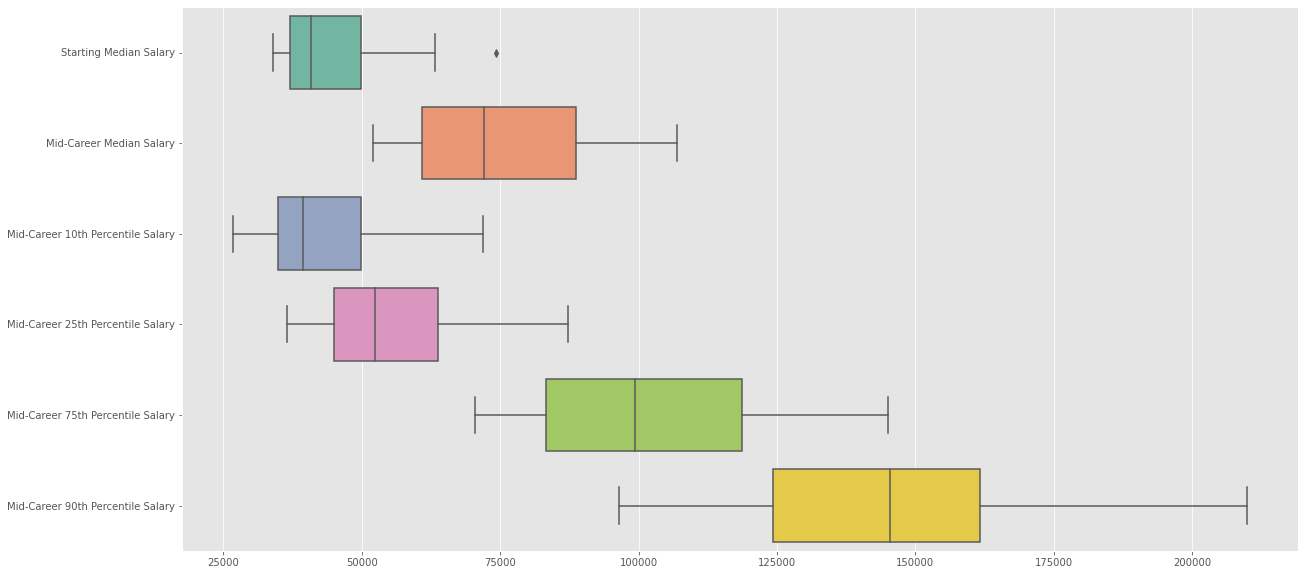

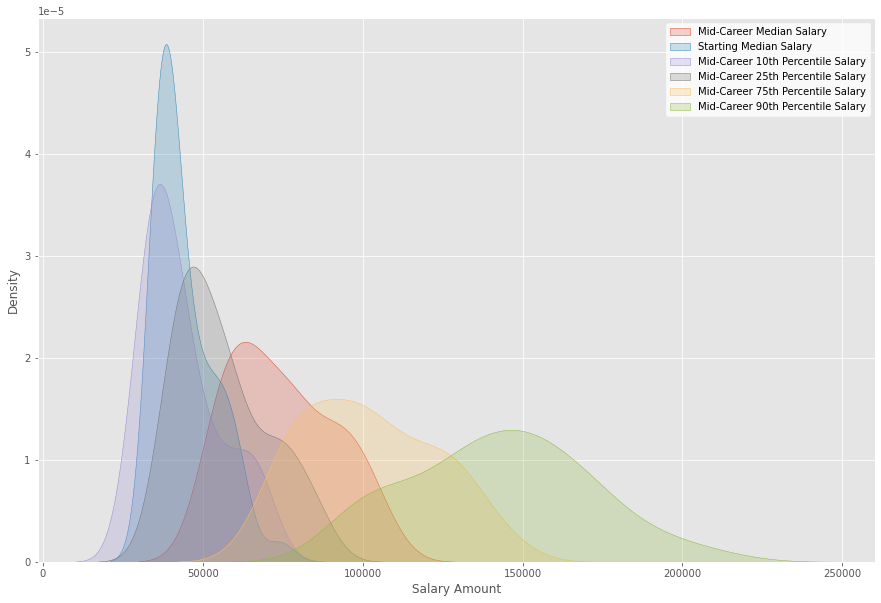

In [6]:
#Box plot to understand the distribution of the variables
ax = sns.boxplot(data=df_Major[["Starting Median Salary","Mid-Career Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 25th Percentile Salary","Mid-Career 75th Percentile Salary","Mid-Career 90th Percentile Salary"]], orient="h", palette="Set2")

#plotting the disribution of the data
f, ax1 = plt.subplots(figsize=(15, 10))
#ditribution plots 
sns.kdeplot(df_Major["Mid-Career Median Salary"], shade=True,label="Mid-Career Median Salary")
sns.kdeplot(df_Major["Starting Median Salary"], shade=True,label="Starting Median Salary")
sns.kdeplot(df_Major["Mid-Career 10th Percentile Salary"], shade=True,label="Mid-Career 10th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 25th Percentile Salary"], shade=True,label="Mid-Career 25th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 75th Percentile Salary"], shade=True,label="Mid-Career 75th Percentile Salary")
sns.kdeplot(df_Major["Mid-Career 90th Percentile Salary"], shade=True,label="Mid-Career 90th Percentile Salary")

legend = plt.legend()
frame = legend.get_frame()
frame.set_color('white')
plt.xlabel("Salary Amount");



From both the plots, we see an apparent change in the concentration of starting median salaries and the mid-career median salaries. We see only one "extreme" value in the starting median salary. As expected, we see the ten percentile of mid-career salaries for the 50 majors be distributed slightly less than the rest of the mid-career salary columns. It was a bit surprising to see that the overall ten percentile for mid-career salaries distribution was "shifted" a bit below the starting median salaries. As expected, the mid-career salaries distribution shifts up as we move up in percentile. 

Next, we primarily focus on the starting median salaries for each major and compare them to the mid-career median salary for each major. 



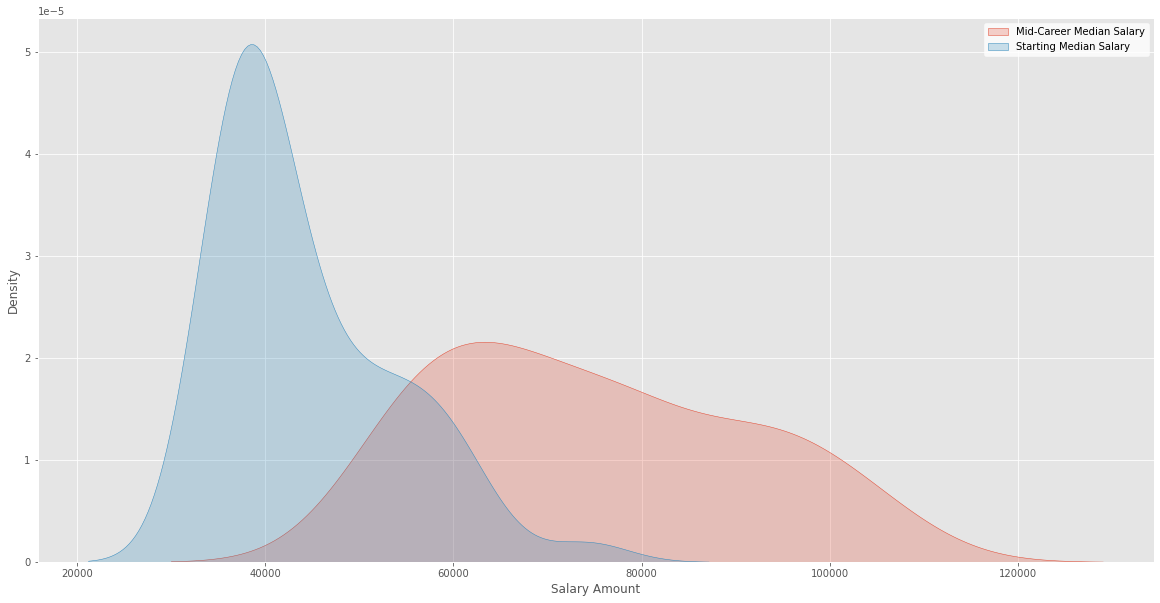

In [7]:
#Graphically looking at starting median salary vs mid-career median salary. 
sns.kdeplot(df_Major["Mid-Career Median Salary"], shade=True,label="Mid-Career Median Salary")
sns.kdeplot(df_Major["Starting Median Salary"], shade=True,label="Starting Median Salary")

legend = plt.legend()
frame = legend.get_frame()
frame.set_color('white')
plt.xlabel("Salary Amount");

The distribution of starting salaries is centered "closely" around the mean, but the mid-career median salaries for majors are much more spread (not centered around the mean). It appears almost as if the higher starting salaried majors had a higher median salary, and majors that had higher starting salaries seem to enjoy a higher rate of growth also. We cannot conclude this just from the plot; further analysis will need to be done (later in the report). 

Next, we will compare the differences between starting and mid-career salaries (side by side). 


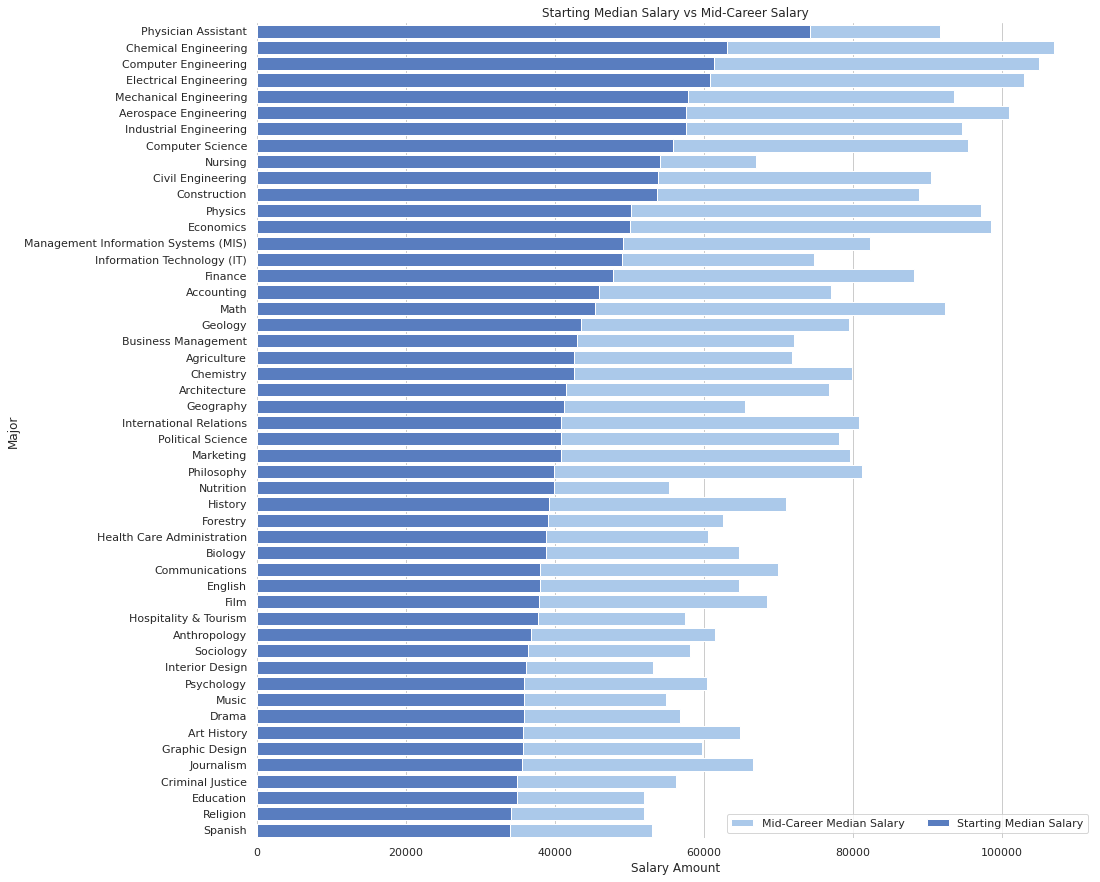

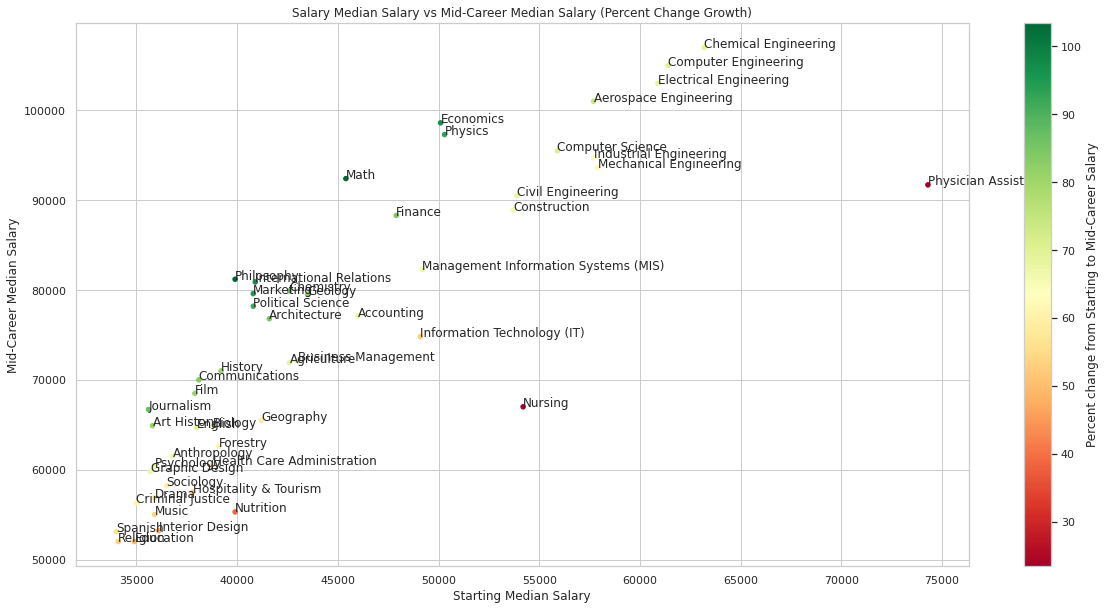

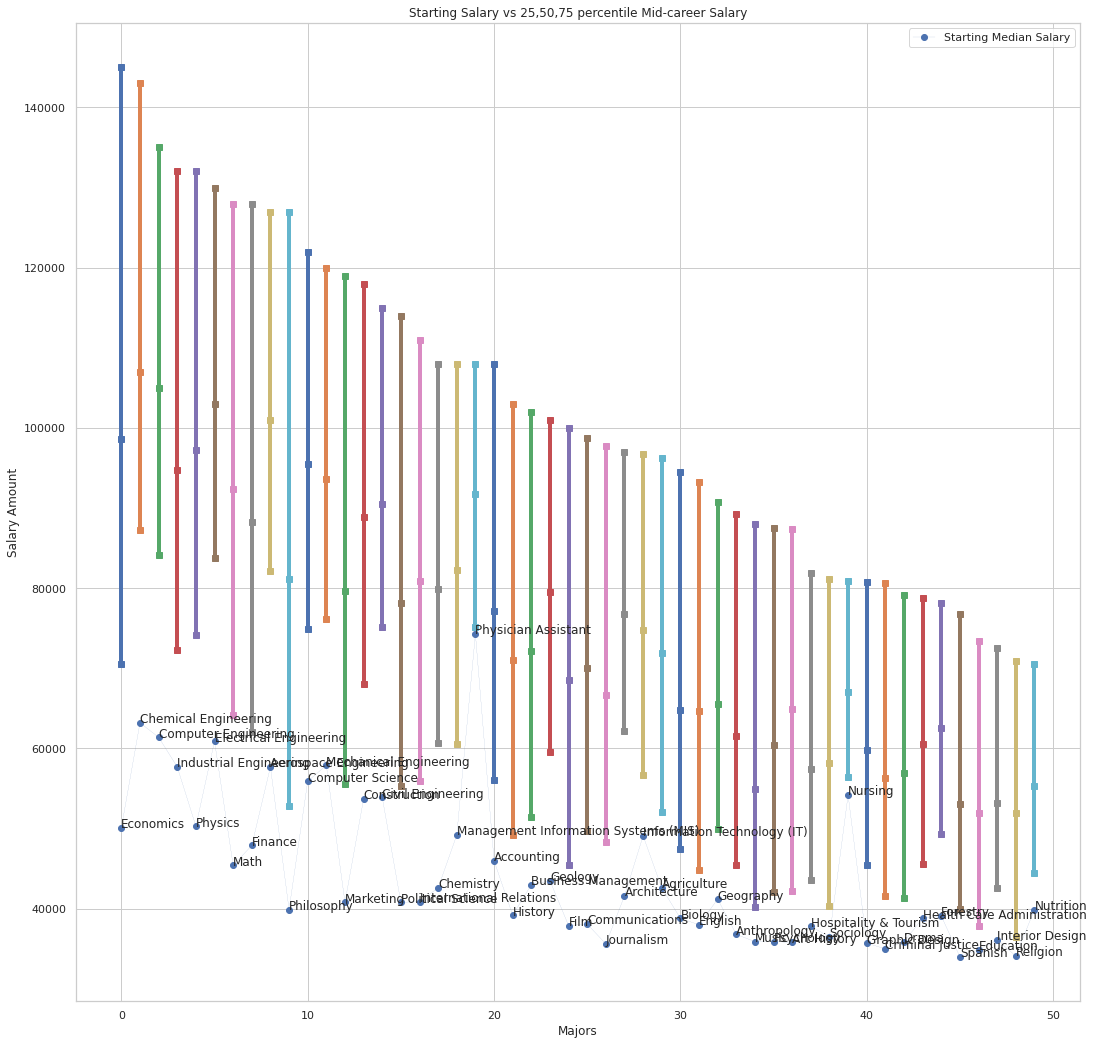

In [8]:
#Visually see the difference

#Plotting both starting salaries and mid career to see the diffrences by major. 

sns.set_theme(style="whitegrid")

#sorting values by starting median salary
df_sortStarting = df_Major.sort_values(by='Starting Median Salary', ascending=False)

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("pastel")
#plotting Major vs Mid-career median salary
sns.barplot(y=df_sortStarting["Major"], x="Mid-Career Median Salary", data=df_sortStarting,label="Mid-Career Median Salary", color="b");
#plotting Major vs starting median salatry
sns.set_color_codes("muted")
sns.barplot(y=df_sortStarting["Major"], x="Starting Median Salary", data=df_sortStarting,label="Starting Median Salary", color="b");

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.xlabel("Salary Amount");
plt.title("Starting Median Salary vs Mid-Career Salary")




#creating an array from 0 to 50 
#adding array to dataframe for plotting 
x = range(0,50)
df_sort75Percentile = df_Major.sort_values(by='Mid-Career 75th Percentile Salary', ascending=False)
df_sort75Percentile["id2"] = x
df_sort75Percentile=df_sort75Percentile.set_index('id2')
df_sort75Percentile["id"] = x


f, ax1 = plt.subplots(figsize=(20, 10))

df_sort75Percentile.plot.scatter(x='Starting Median Salary',y='Mid-Career Median Salary', c='Percent change from Starting to Mid-Career Salary', cmap="RdYlGn",ax=ax1)
for i, val in enumerate(df_sort75Percentile["Major"]):
    plt.annotate(val,xy=(df_sort75Percentile['Starting Median Salary'][i],df_sort75Percentile['Mid-Career Median Salary'][i])) 
plt.title("Salary Median Salary vs Mid-Career Median Salary (Percent Change Growth)");



#plotting starting salary vs median 25,50,75 mid career percentiles 

#Changing the name dataframe to work with code
df_Major = major

f, ax1 = plt.subplots(figsize=(18, 18))

for i, val in enumerate(df_sort75Percentile["Major"]):
    x = np.full((1,3),df_sort75Percentile['id'][i])
    y = np.full((1,3),0)
    
    y[0][0] = df_sort75Percentile["Mid-Career 25th Percentile Salary"][i]
    y[0][1] = df_sort75Percentile["Mid-Career Median Salary"][i]
    y[0][2] = df_sort75Percentile["Mid-Career 75th Percentile Salary"][i]
    
    plt.plot(x[0],y[0],marker='s',linewidth=4)
    
    
plt.plot(df_sort75Percentile['id'],df_sort75Percentile['Starting Median Salary'],marker='o',label='Starting Median Salary',linewidth=.1)    
ax1.legend()    
   
for i, val in enumerate(df_sort75Percentile["Major"]):
    plt.annotate(val,xy=(df_sort75Percentile['id'][i],df_sort75Percentile['Starting Median Salary'][i])) 
    
plt.title("Starting Salary vs 25,50,75 percentile Mid-career Salary");

plt.ylabel("Salary Amount");
plt.xlabel("Majors");


#difference 
diff = df_sort75Percentile["Mid-Career Median Salary"]-df_sort75Percentile["Starting Median Salary"]
Mid_Career_75_25_Range = df_sort75Percentile["Mid-Career 75th Percentile Salary"]-df_sort75Percentile["Mid-Career 25th Percentile Salary"]
df_sort75Percentile["Difference Between Mid-Career and Starting Salary"] = diff   
df_sort75Percentile["Mid_Career_75_25_Range"] = Mid_Career_75_25_Range 


    
    

Graph 1 Bar Graph: Starting Median Salary vs Mid-Career Median Salary For this graph we arrange the degree Major dataset by highest starting salary to lowest starting salary. We then do a side bar graph with the amount of the starting salary (dark blue) and we plot it with its accompanying mid-career median salary (light blue).

Graph 2 Scatterplot: Starting Median Salary vs Mid-Career Median Salary (Percent growth color scheme) For this plot, we did a scatterplot with starting median salary vs mid-career median salary, with the color scheme being the percent growth from starting salary to mid-career salary. Higher growth rates are greener, with the lowest growth rates being redder.

Graph 3 Starting salary vs 25-75 percentile range of mid-career For this plot we plot the starting median salary (blue dots) vs the 25,75 percentile range (vertical line above starting median salary).

From the three graphs above, Physician Assistant clearly shows that it has the highest earning starting salary, but it has one of the lowest salary growths for mid-careers. One notable degree was Mathematics, which had a starting salary below the average starting median salary and ended up having one of the best salary growths from starting to mid-career median salary.

There are a few degrees that had "low" starting salary ended up having the best growth ratios to mid-career, and some "high" starting salary degrees ended up with some of the lowest growth rates to mid-career. Those are just a few examples from an "eye-test," but is there a relationship between starting salaries and growth rates to mid-career salaries?

In the Analysis Methodology section, we will try to answer two questions in detail:

1) Does your starting salary have a relationship with the salary growth rate? (do higher salaries indicate higher mid-career salaries)

2) What is the best Major to take? (We define best majors as a combination of high starting salary and high growth).

## Analysis Methodology: University Majors

In order to anwser the two questions, we need to do deeper analysis on major. 

In this section, we will look at a couple new variables to help us analyze. We call one of the variables 'difference' which is the difference between mid-career salary minus starting salary. The other variables is the rank....


In [9]:
# adding a difference between Starting Median Salary and Mid-Career Median Salary
difference =  major['Mid-Career Median Salary']-major['Starting Median Salary']
major["difference"] = difference
major.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,difference
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0,31100.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,43300.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0,29300.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0,24700.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0,35200.0


In [10]:
# sorting mid-career median salary
mid_sala = major.sort_values(by='Mid-Career Median Salary', ascending=False)
mid_sala.head()

,Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,difference
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0,43800.0
12,Computer Engineering,61400.0,105000.0,71.0,66100.0,84100.0,135000.0,162000.0,43600.0
19,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0,42100.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,43300.0
17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0,48500.0


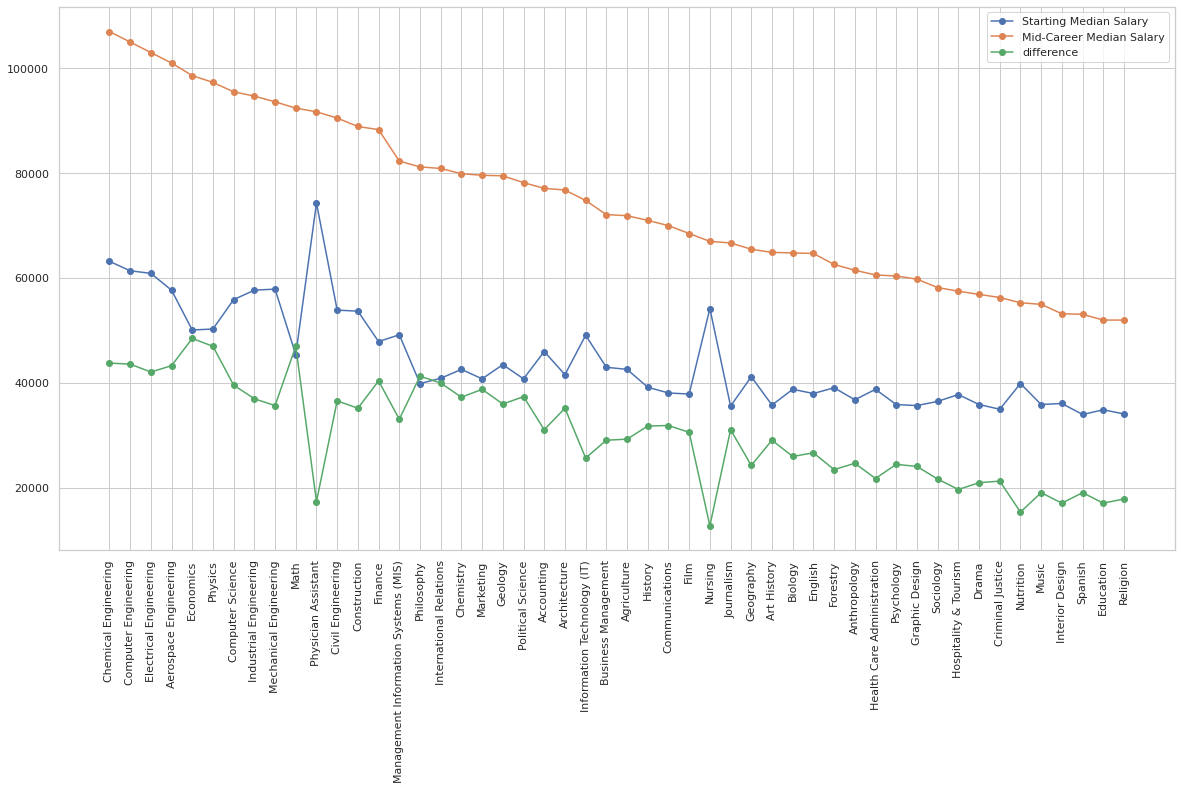

In [11]:
plt.plot(mid_sala["Major"], mid_sala['Starting Median Salary'], label = 'Starting Median Salary',marker='o')
plt.plot(mid_sala["Major"], mid_sala['Mid-Career Median Salary'], label = 'Mid-Career Median Salary',marker='o')
plt.plot(mid_sala["Major"], mid_sala['difference'], label = 'difference',marker='o')
plt.legend()
plt.xticks(rotation = 90);

### Sub-conclusion 1

In this graph, we can see the sorted plot by mid-career salary. Chemical Engineering looks like a ideal major to take and it can be the best major as we defined. However, the difference curve is not ideal because there are some high salary entries that only hold a low difference value and some low salary entries that hold a high difference value. That means some majors are still worth to take because they have a great difference and relative high mid-career salary. So we have to come up with a new method to qualify the real **Best** majors.

In [12]:
# create a sorted difference
# adding a rank list

diff = major[['Major', 'Mid-Career Median Salary', 'difference']]
diff = diff.sort_values(by='Mid-Career Median Salary', ascending=False)
diff['rank'] = [51-x for x in range(1,51)]
diff = diff.sort_values(by='difference', ascending=False)
diff = diff.set_index('Major')
diff.head()

,Mid-Career Median Salary,difference,rank
Major,,,
Economics,98600.0,48500.0,46
Math,92400.0,47000.0,41
Physics,97300.0,47000.0,45
Chemical Engineering,107000.0,43800.0,50
Computer Engineering,105000.0,43600.0,49


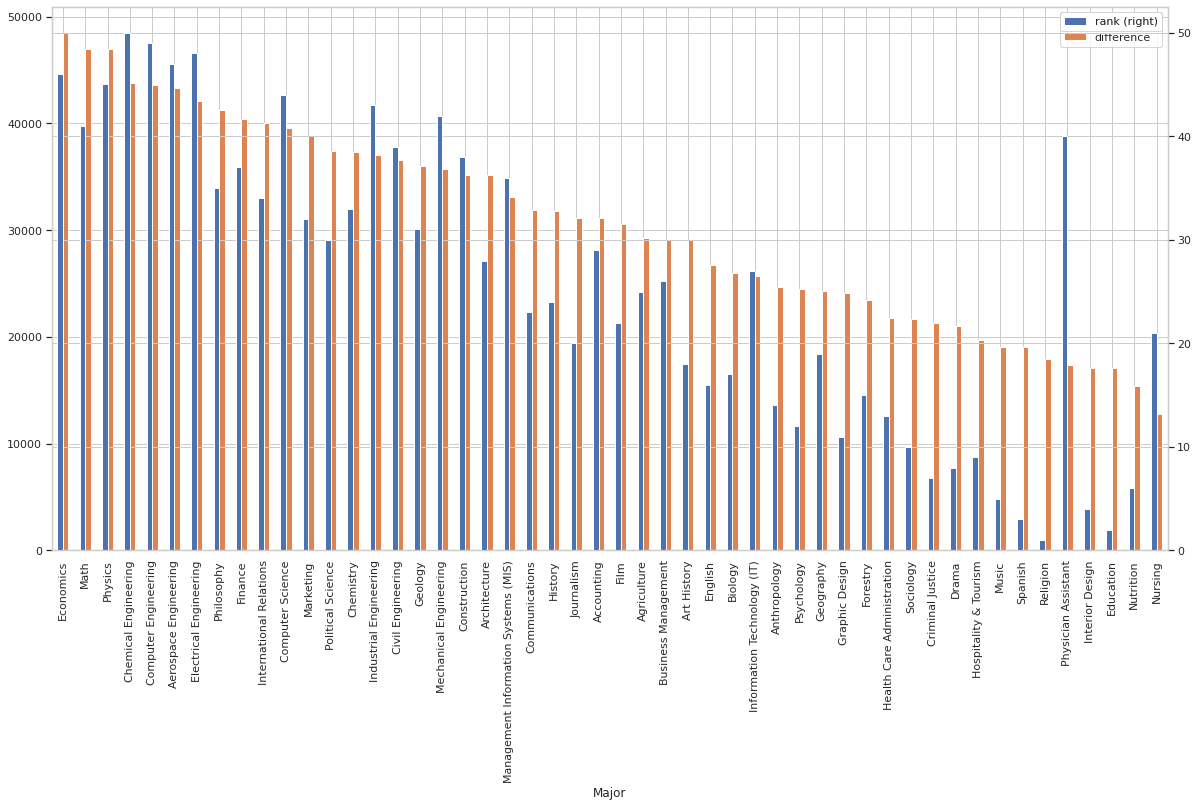

In [13]:
diff[['rank', 'difference']].plot(kind='bar', secondary_y = ["rank"], grid=True, label = 'rank')

# diff['difference'].plot(grid=True, label = 'difference')
# plt.plot(diff["Major"], diff['Mid-Career Median Salary'], label = 'Mid-Career Median Salary')
# plt.plot(diff["Major"], diff['difference'], label = 'difference')
plt.legend()

This the basic idea we designed. Based on the dataset that sorted by mid-career, we give a rank for each major. From 1-50 with higher numbers representing a higher positon in mid-career. For example, Chemical Engineering's rank is 50 and Religion's rank is 1. 

Then, we create a new dataset that only has difference and rank. We can get this graph just simply by sorting the difference column. Now we can see a little bit more intuitively how difference and rank are related. From this graph, we really want to select majors that have both large increases and relatively high mid salaries.

In [14]:
class_start = major[['Major', 'Starting Median Salary']]
sort = class_start.sort_values(by='Starting Median Salary', ascending=False)
sort['rank'] = [51-x for x in range(1,51)]
sort.head()

list_group = np.array_split(sort, 5)
list_group[1]

,Major,Starting Median Salary,rank
14,Construction,53700.0,40
44,Physics,50300.0,39
17,Economics,50100.0,38
35,Management Information Systems (MIS),49200.0,37
31,Information Technology (IT),49100.0,36
22,Finance,47900.0,35
0,Accounting,46000.0,34
37,Math,45400.0,33
25,Geology,43500.0,32
7,Business Management,43000.0,31


In [15]:
difference = major[['Major', 'difference']]
sort_diff = difference.sort_values(by='difference', ascending=False)
sort_diff['rank'] = [51-x for x in range(1,51)]
list_diff = np.array_split(sort_diff, 5)
list_diff[0]

,Major,difference,rank
17,Economics,48500.0,50
44,Physics,47000.0,49
37,Math,47000.0,48
8,Chemical Engineering,43800.0,47
12,Computer Engineering,43600.0,46
1,Aerospace Engineering,43300.0,45
19,Electrical Engineering,42100.0,44
42,Philosophy,41300.0,43
22,Finance,40400.0,42
33,International Relations,40000.0,41


In [16]:
selected = []

for i in range(5):
    int_df = pd.merge(list_group[i], list_diff[i], how ='inner', on =['Major'])
    selected.append(int_df)
    
selected

[                    Major  Starting Median Salary  rank_x  difference  rank_y
 0    Chemical Engineering                 63200.0      49     43800.0      47
 1    Computer Engineering                 61400.0      48     43600.0      46
 2  Electrical Engineering                 60900.0      47     42100.0      44
 3   Aerospace Engineering                 57700.0      45     43300.0      45,
           Major  Starting Median Salary  rank_x  difference  rank_y
 0  Construction                 53700.0      40     35200.0      32
 1       Geology                 43500.0      32     36000.0      34,
          Major  Starting Median Salary  rank_x  difference  rank_y
 0  Agriculture                 42600.0      30     29300.0      24
 1      History                 39200.0      21     31800.0      28,
                         Major  Starting Median Salary  rank_x  difference  \
 0                    Forestry                 39100.0      20     23500.0   
 1  Health Care Administration     

### Sub-conclusion 2

We have done a lot of analysis on difference and mid-career, so we also need to include starting salary. Here is the result that we analyzed on difference and starting salary. As we can see the groups up there, there are five groups. From group 1 to group 5 they represent of 'best', 'great', 'good', 'not good', 'not recommend' group. For example, in *best group* which is the first group, Chemical Engineering, Computer Engineering, Electrical Engineering, Aerospace Engineering are highly recommend to take because they have relative high starting salary and "big" percentage increase to mid-career.  

In [17]:
alpha_diff = sort_diff.sort_values(by=['Major'], ascending=True)
alpha_diff.head()

,Major,difference,rank
0,Accounting,31100.0,26
1,Aerospace Engineering,43300.0,45
2,Agriculture,29300.0,24
3,Anthropology,24700.0,18
4,Architecture,35200.0,31


In [18]:
alpha_start = sort.sort_values(by=['Major'], ascending=True)
alpha_start.head()

,Major,Starting Median Salary,rank
0,Accounting,46000.0,34
1,Aerospace Engineering,57700.0,45
2,Agriculture,42600.0,30
3,Anthropology,36800.0,13
4,Architecture,41600.0,28


In [19]:
sum_rank = alpha_start['rank'] + alpha_diff['rank']
class_start['sum_rank'] = sum_rank
df_sum_rank = class_start.sort_values(by=['sum_rank'], ascending=False)

df_sum_rank.head()

/tmp/ipykernel_10996/3908499153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_start['sum_rank'] = sum_rank


,Major,Starting Median Salary,sum_rank
8,Chemical Engineering,63200.0,96
12,Computer Engineering,61400.0,94
19,Electrical Engineering,60900.0,91
1,Aerospace Engineering,57700.0,90
44,Physics,50300.0,88


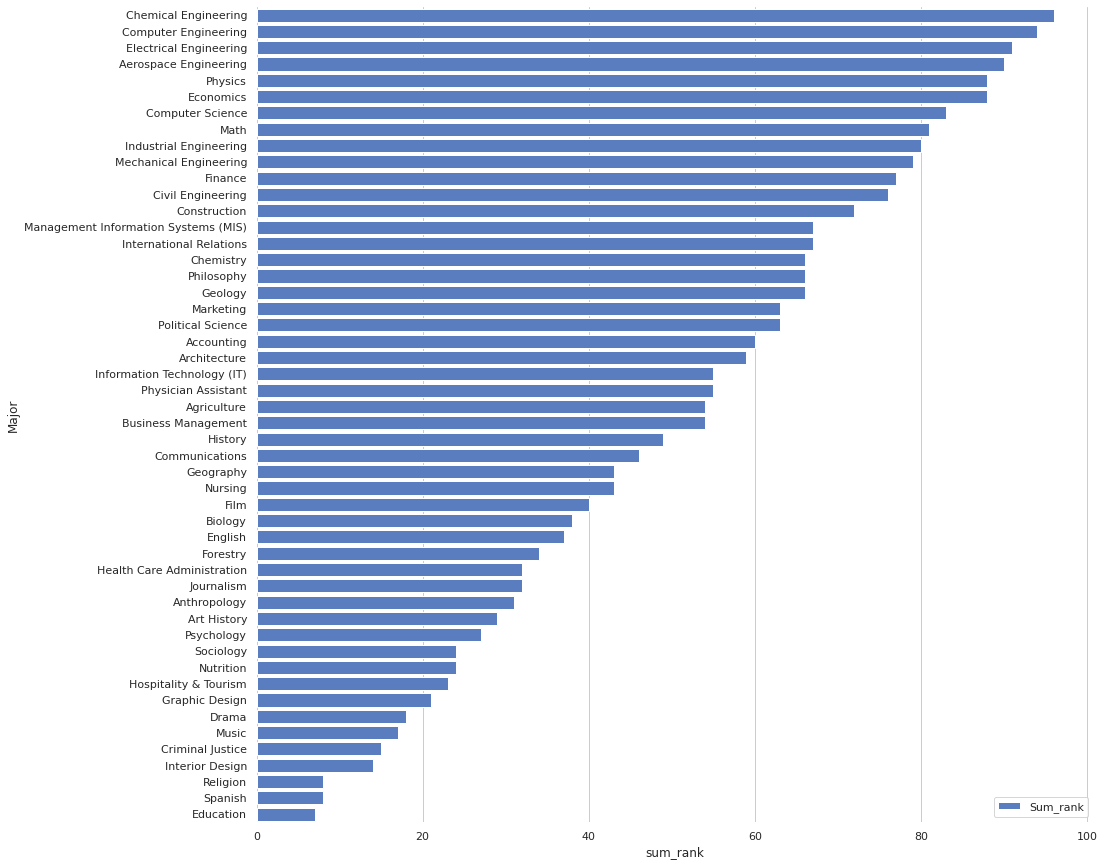

In [20]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(y=df_sum_rank["Major"], x="sum_rank", data=df_sum_rank,label="Sum_rank", color="b")

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

### Sub-conclusion 3

This graph is the final version of 5 groups in Sub-conclusion 2. To visualize the final rank of each major, we make this bar plot for everyone who wants to know details of rank of major. Right here we assigned a rank for each column ex: Starting Salary and difference. Then we sum those ranks togather to see which is the best major in our dataset. Until now, we can answer a question in last section: Which is the best major? 

1. Chemical Engineering, Computer Engineering, Electrical Engineering, Aerospace Engineering, Economics, CS, and Math can be top 8 *best major*

2. The reason why they can be best majors is that they have pretty high starting salary and with super high increasing during their career. They can be the best majors to consider if you do care about the salary!

### Linear Regression

In this section we will try to understand the relationship of the variables. Primarly using Linear Regression.

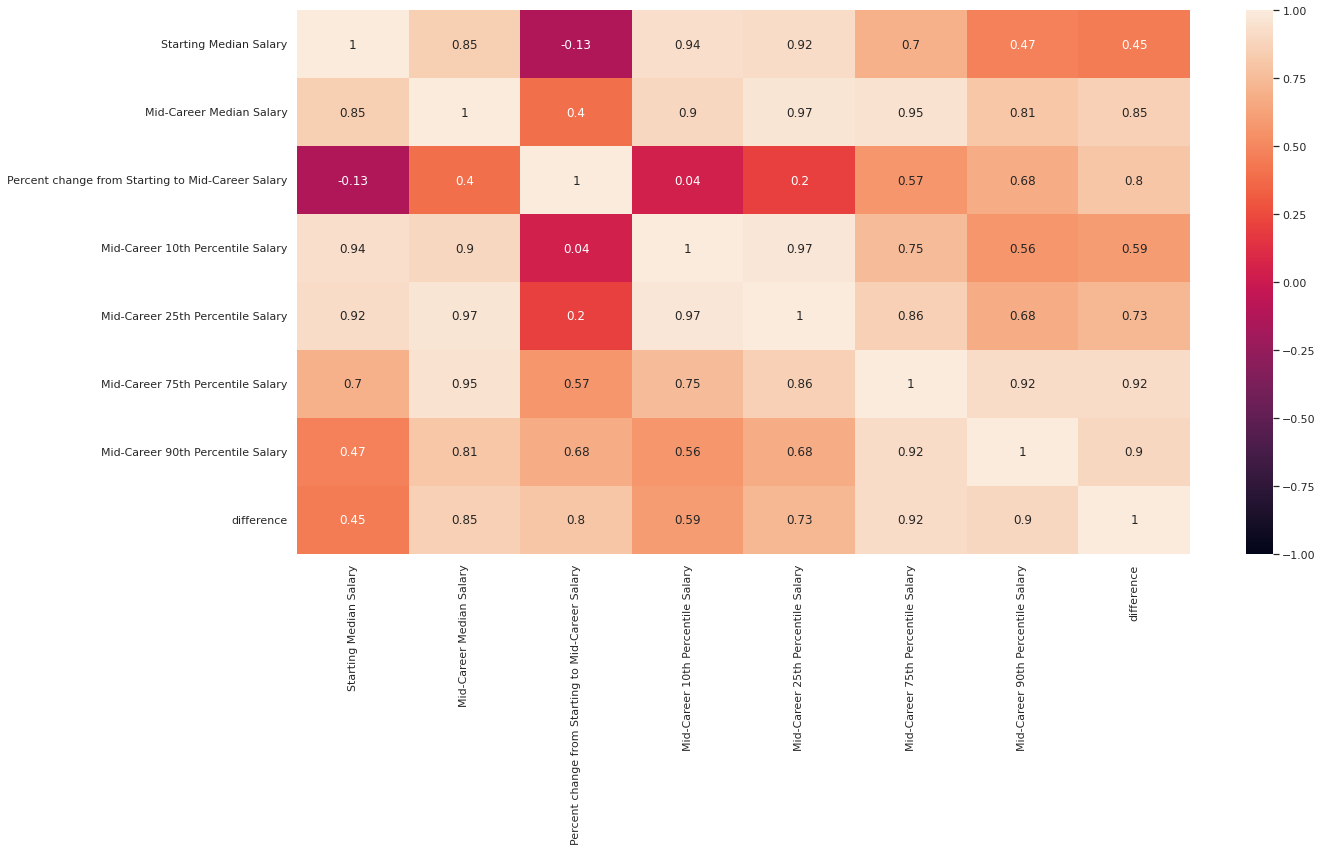

In [21]:
#heat map

# major = major.set_index('Major')
# major = major.drop(columns=['id'])
corr_major = major.corr()
heatmap = sns.heatmap(corr_major, vmin=-1, vmax=1, annot=True)

This heat map can only tell us some general information between each variables. We will use it as a frame to guide us doing some research in details. 

1. difference ~ Starting salary have relative high relation and we want to know why they have this relationshp?

2. Percent_change ~ Starting salary's correlation are super close to 0, we also need to figure out why they form like this?

3. Mid_Career ~ Starting salary have high relationship but this value is not we expected, so we want to interpret it in details.


Next, we will adjust our dataframe for Linear Regression. 

In [22]:
# linear regression
lr_major = mid_sala[['Major','difference', 'Mid-Career Median Salary', 'Starting Median Salary',"Percent change from Starting to Mid-Career Salary"]]
lr_major.head()


,Major,difference,Mid-Career Median Salary,Starting Median Salary,Percent change from Starting to Mid-Career Salary
8,Chemical Engineering,43800.0,107000.0,63200.0,69.3
12,Computer Engineering,43600.0,105000.0,61400.0,71.0
19,Electrical Engineering,42100.0,103000.0,60900.0,69.1
1,Aerospace Engineering,43300.0,101000.0,57700.0,75.0
17,Economics,48500.0,98600.0,50100.0,96.8


In [23]:
lr_start = lr_major.sort_values(by=['Starting Median Salary'], ascending=True)
lr_start.head()

,Major,difference,Mid-Career Median Salary,Starting Median Salary,Percent change from Starting to Mid-Career Salary
49,Spanish,19100.0,53100.0,34000.0,56.2
47,Religion,17900.0,52000.0,34100.0,52.5
18,Education,17100.0,52000.0,34900.0,49.0
15,Criminal Justice,21300.0,56300.0,35000.0,60.9
34,Journalism,31100.0,66700.0,35600.0,87.4


In [24]:
lr_start = lr_start.rename(columns={"Mid-Career Median Salary": "Mid_Career", "Starting Median Salary": "Starting","Percent change from Starting to Mid-Career Salary": "Percent_change"}, errors="raise")
lr_start.head()


,Major,difference,Mid_Career,Starting,Percent_change
49,Spanish,19100.0,53100.0,34000.0,56.2
47,Religion,17900.0,52000.0,34100.0,52.5
18,Education,17100.0,52000.0,34900.0,49.0
15,Criminal Justice,21300.0,56300.0,35000.0,60.9
34,Journalism,31100.0,66700.0,35600.0,87.4


                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     12.18
Date:                Wed, 27 Apr 2022   Prob (F-statistic):            0.00105
Time:                        15:57:56   Log-Likelihood:                -522.92
No. Observations:                  50   AIC:                             1050.
Df Residuals:                      48   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04   5943.616      1.711      0.0

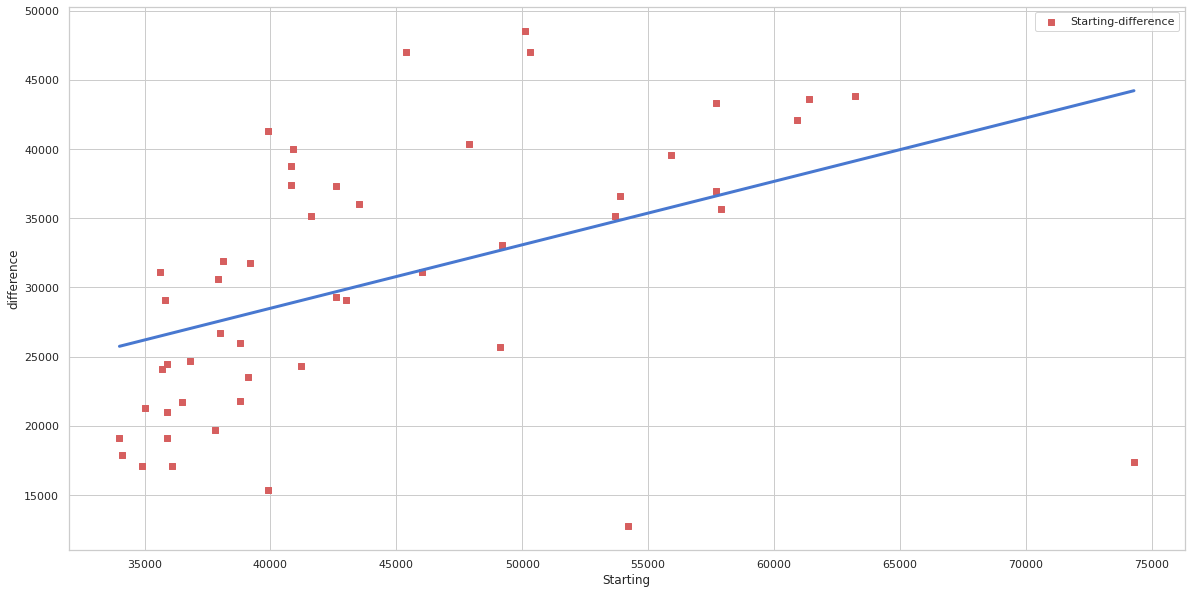

In [25]:
diff_start_ols = sm.ols(formula="difference ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['difference'],c='r',marker='s',label='Starting-difference')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('difference')
plt.legend()

### LR: difference ~ Starting Salary

From the stats table, we know that $R^2$ = 0.202 which indicates that those two variables barely have any linear relationship. 

Interpretion: This is the result we expected. This result proved our hypothesis: There is no relationship between starting salary and difference. That means if you choose a major that has a low starting salary, you don't have to feel bad about it. Because there is no evidence that shows that you cannot get a high salary in your mid-career. 

**Personally, I quite like this fact, because it gives everyone who likes their major a powerful comfort from a salary perspective. Everyone likes to study their favorite subject, but everyone needs to face their own salary level. The conclusion is that as long as you are willing to take the profession you love seriously, your salary won't let you down. Because the salary increase has nothing to do with the major.**

                            OLS Regression Results                            
Dep. Variable:             Mid_Career   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           7.30e-15
Time:                        15:57:56   Log-Likelihood:                -522.92
No. Observations:                  50   AIC:                             1050.
Df Residuals:                      48   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.017e+04   5943.616      1.711      0.0

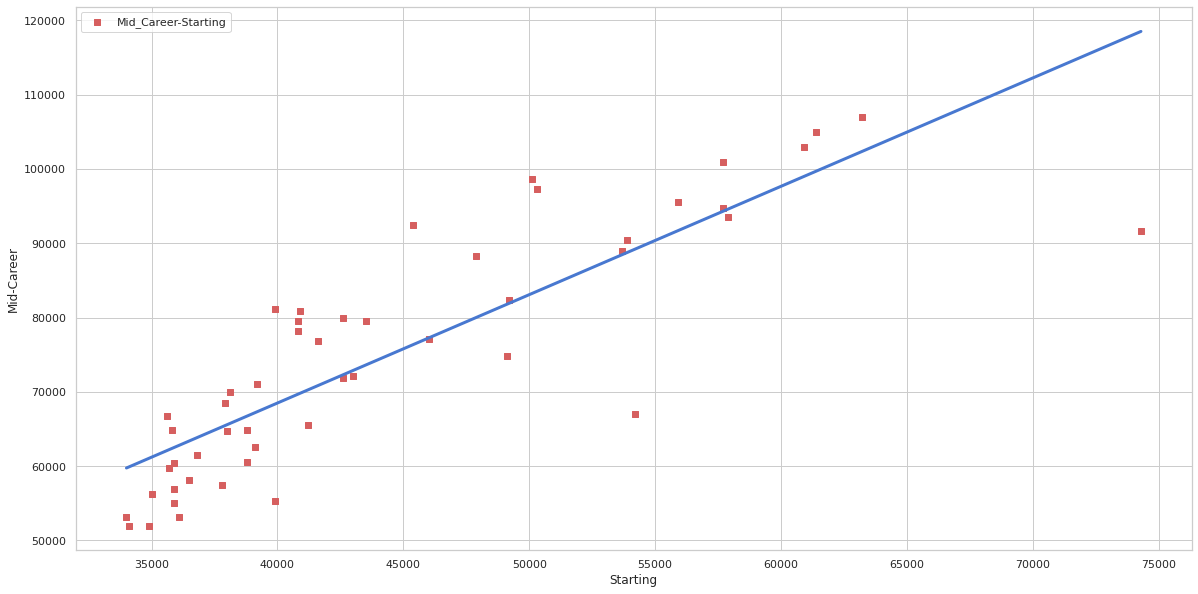

In [26]:
diff_start_ols = sm.ols(formula="Mid_Career ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['Mid_Career'],c='r',marker='s',label='Mid_Career-Starting')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('Mid-Career')
plt.legend()

### LR: Mid_Career ~ Starting Salary

Our simple linear regression model found that for every dollar earned in a starting salary, the median mid-career salary increases about .72 cents per dollar. We suspected that there was a strong correlation between of starting median salary and the mid-career median salary (which makes sense intuitively since the higher starting salary makes a higher salary "appear high" since it has a higher starting base salary. The thing we really want to test is if starting salary has any indication on the rate of mid-career salary growth.



                            OLS Regression Results                            
Dep. Variable:         Percent_change   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8852
Date:                Wed, 27 Apr 2022   Prob (F-statistic):              0.351
Time:                        15:57:56   Log-Likelihood:                -214.25
No. Observations:                  50   AIC:                             432.5
Df Residuals:                      48   BIC:                             436.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.6819     12.388      6.513      0.0

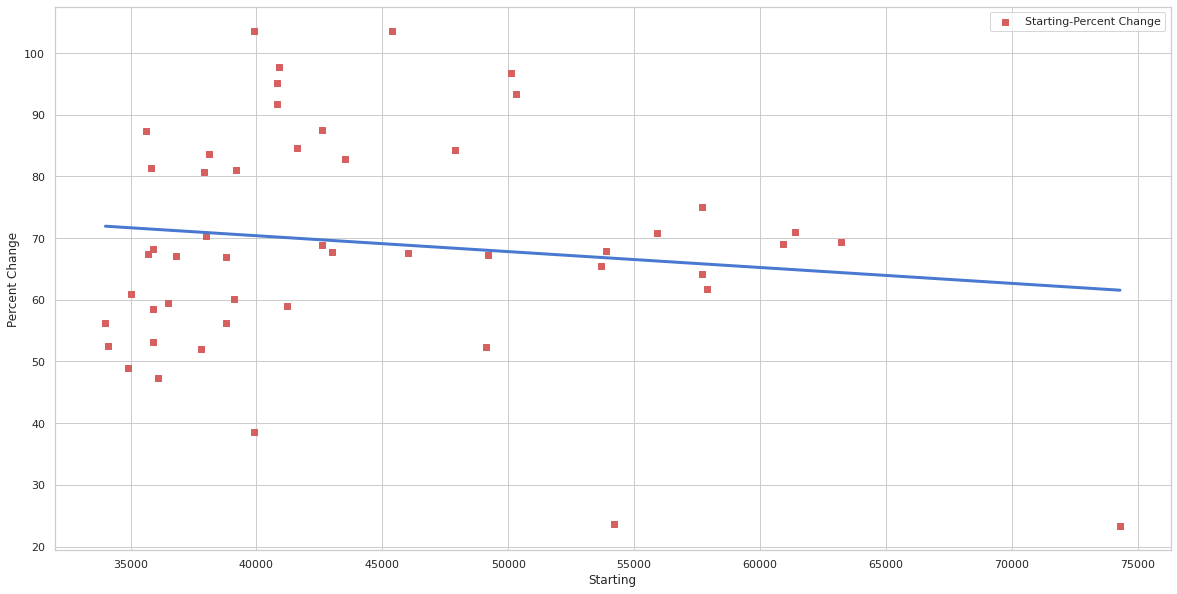

In [27]:

diff_start_ols = sm.ols(formula="Percent_change ~ Starting", data=lr_start).fit()
print(diff_start_ols.summary())

plt.scatter(x=lr_start['Starting'],y=lr_start['Percent_change'],c='r',marker='s',label='Starting-Percent Change')
plt.plot(lr_start['Starting'],diff_start_ols.predict(),c='b',linewidth=3)
plt.xlabel('Starting') 
plt.ylabel('Percent Change')
plt.legend()

### LR: Percent_change ~ Starting Salary

Since the R^2 value is .018 and by the slope of the regression line in the plot above, we see that the correlation is -.134, since it's near-zero, this tells us that there is no strong linear relationship between those two variables. This tells us that just because a major has a high starting salary, that may not indicate you will have a high percent salary growth (which in the long run might be better).

Percent_change is a better variable than difference to understand the relationship between salary and major. Even though our project is focusing on salary, we do respect everyone's preference. I hope you can get more than just salary from our project. The data tells us, until today, it is still worth choosing the major you like because you always have a chance to earn a better life in your major.

## Conclusion: Major

We wanted to answer two questions from this Major dataset: "Does your starting salary play a role in the rate of salary growth to mid-career?" and "what is the best major (high starting salary with high salary growth) to take?". From our exploratory and methodology analysis we found that there is no strong relationship between a high starting salary and high salary growth to mid-career. From our linear regression model we found that the correlation is near-zero, this tells us that there is no strong linear relationship between those two variables. Just because a major has a high starting salary, that may not indicate you will have a high percent salary growth. Since our data only limited us to mid-career, the rate of growth might play a bigger role in the later years of one's career. From our results, it's best to not focus so much on which major will provide the best starting salary (however tempting that might be) and instead focus on the rate of salary growth. We also found that the best majors that have a combination of high starting salary and high rate of salary growth was Chemical Engineering, Computer Engineering, Electrical Engineering, Aerospace Engineering, Economics, CS, and Math.


Next we explore Universties by region and type. 






# Analysis of Universties by region and type 

For this section, we will focus on the remaining two datasets: Universities by school type and by region. For this section, we will focus on the remaining two datasets: Universities by school type and by region. After revising the two datasets, we found that they are very similar (more than 250 entries are the same); thus, we decided to combine the two sets and remove the entries that don't have both university type and region.

The next lines of code do merge the two sets and removes the entries without both a region and type variable. 



In [28]:
major = pd.read_csv("Project_Major_dataset.csv")
major.rename(columns = {'Unnamed: 0':'Major'}, inplace = True)

df_region = pd.read_csv("Project_school_dataset.csv")
df_region.rename(columns = {'Unnamed: 0':'University'}, inplace = True)

df_type = pd.read_csv("Project_school_type_dataset.csv")
df_type.rename(columns = {'Unnamed: 0':'University'}, inplace = True)

# rename all columns
df_region.rename(columns = {'Starting Median Salary':'Starting_region', 'Mid-Career Median Salary':'Mid_region',\
                            'Mid-Career 25th Percentile Salary': 'Mid_25th_region', \
                           'Mid-Career 75th Percentile Salary': 'Mid_75th_region',\
                           'Mid-Career 90th Percentile Salary': 'Mid_90th_region',\
                           'Mid-Career 10th Percentile Salary': 'Mid_10th_region'}, inplace = True)
df_region.head()


df_type.rename(columns = {'Starting Median Salary':'Starting_type', 'Mid-Career Median Salary':'Mid_type',\
                          'Mid-Career 25th Percentile Salary': 'Mid_25th_type', \
                           'Mid-Career 75th Percentile Salary': 'Mid_75th_type',\
                           'Mid-Career 90th Percentile Salary': 'Mid_90th_type',\
                           'Mid-Career 10th Percentile Salary': 'Mid_10th_type'}, inplace = True)

# merged dataset
df_type_region = pd.merge(df_region, df_type, how ='inner', on =['University'])
df_type_region = df_type_region[['University', 'Region', 'School Type', 'Starting_region', 'Mid_region', 'Mid_10th_region', 'Mid_25th_region','Mid_75th_region','Mid_90th_region',]]

print(len(df_type_region))
df_type_region.head()




268


,University,Region,School Type,Starting_region,Mid_region,Mid_10th_region,Mid_25th_region,Mid_75th_region,Mid_90th_region
0,California Institute of Technology (CIT),California,Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
1,Harvey Mudd College,California,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
2,"University of California, Berkeley",California,State,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
3,Occidental College,California,Liberal Arts,51900.0,105000.0,NaN,54800.0,157000.0,NaN
4,Cal Poly San Luis Obispo,California,State,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0


The merged dataset is made up of 268 different Universities with 7 variables (5 salary variables and 2 categorical variables). Next we will do some exploratory analysis. 

## Exploratory Analysis of University Region and Type

The next two figures will be scatter plot matrices (one scaled by region and the other scaled by universtiy type).

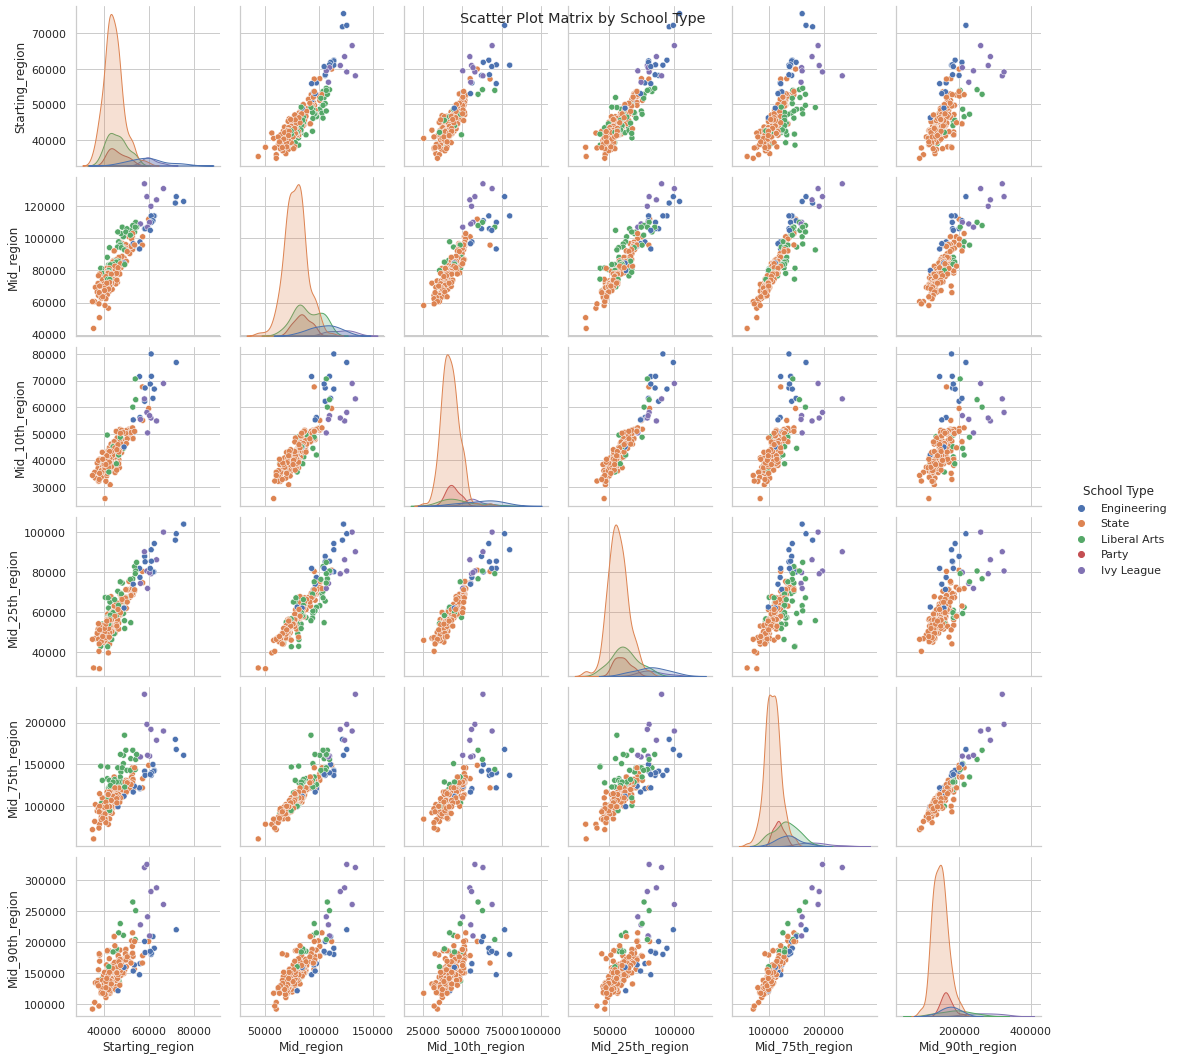

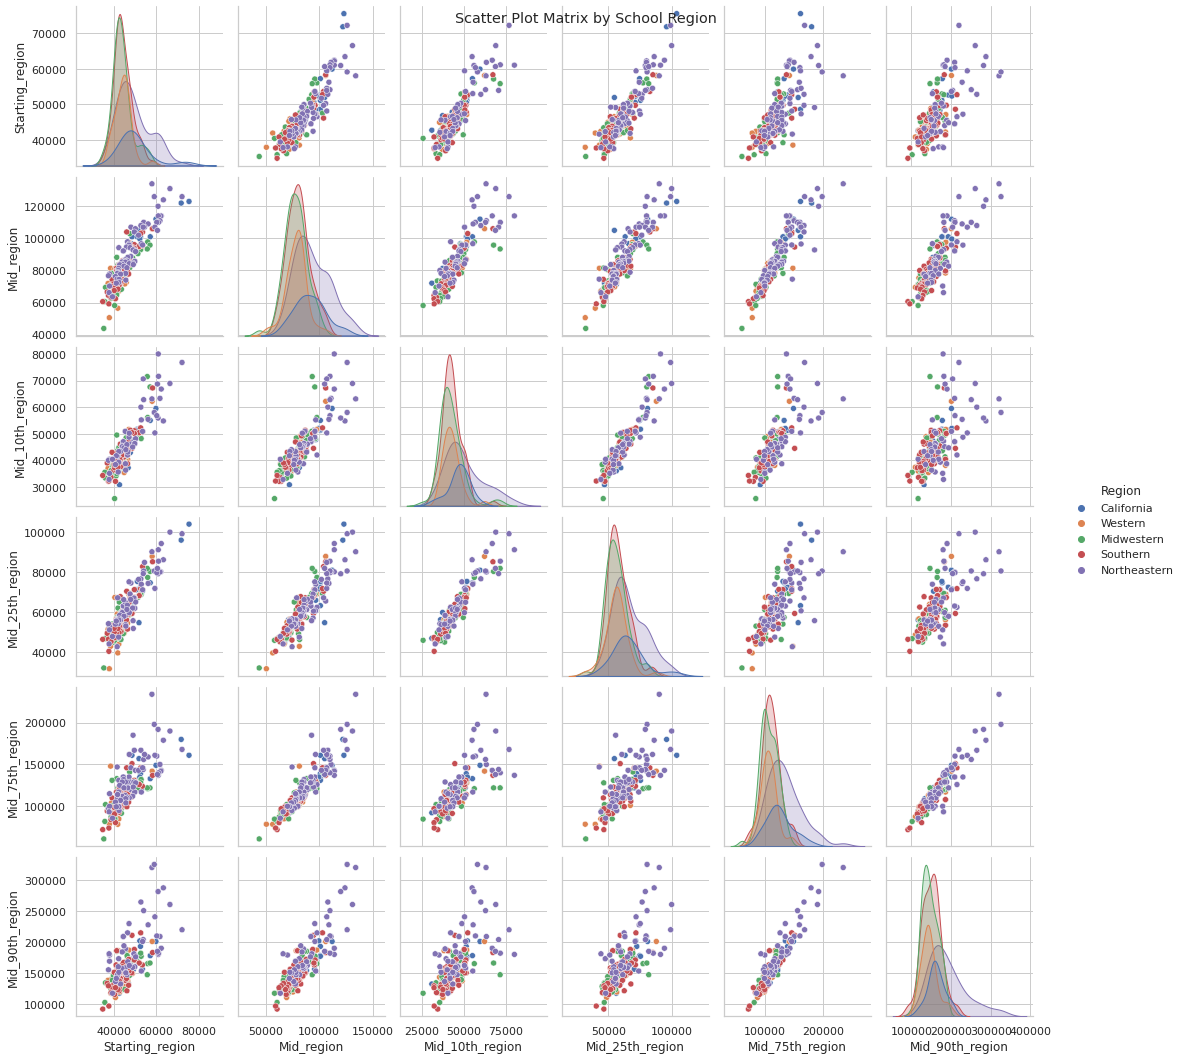

In [29]:
#Scatter Matrix plots by region and type 
plot = sns.pairplot(df_type_region, hue="School Type");
plot.fig.suptitle('Scatter Plot Matrix by School Type');

plot2=sns.pairplot(df_type_region, hue="Region");
plot2.fig.suptitle('Scatter Plot Matrix by School Region');



Graph 1 Scatter plot matrix (Sorted by University Type): We see that all of the variables "appear" to have a strong linear relationship with each other. The more important feature to notice is the distribution of university types. We see that there are five different types of universities: Engineering, State, Liberal Arts, Party, and Ivy League. 

Graph 2 Scatter plot matrix (Sorted by University Region): We see that there are 5 different regions: California, Western, MidWestern, Southern, Northeastern. 


In the next section we will focus on Starting Median Salary vs Mid-Career Median Salary sorted by region then by type. 

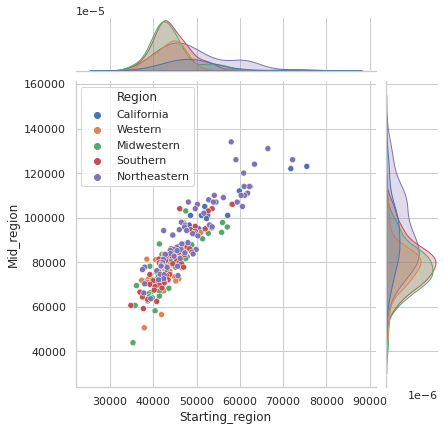

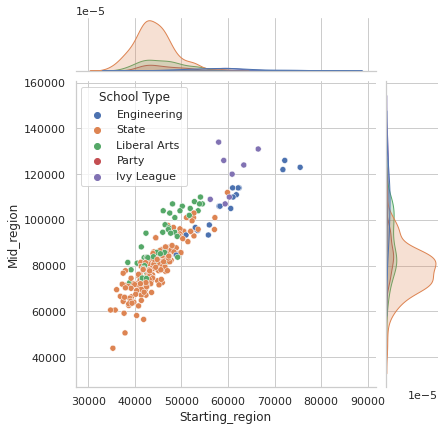

In [30]:
sns.jointplot(data=df_type_region, x="Starting_region", y="Mid_region", hue="Region");
sns.jointplot(data=df_type_region, x="Starting_region", y="Mid_region", hue="School Type");

Graph 1 Starting Median vs Mid-Career Median (Sorted by Region): 
From the plot, it's a bit difficult to tell each region apart. From the scatter plot, the regions almost "blend" together. For example, the Northeastern universities are spread out from top to bottom. 

Graph 2 Starting Median vs Mid-Career Median (Sorted by University Type): For the second plot, we see that universities by school type appear to be more grouped together. For example, the State universities make up the bottom of the scatter plot while the ivy league schools make up the upper part. From the scatter plot, it appears that universities that are of the same type tend to produce similar starting and mid-career salaries (this will need to be investigated deeper).

## Analysis Methodology: Universities by Type and Region 

In the next sections we will try to understand the relationship between Wages and University Region/Type.  


# K-NN Predicting Mid-Career wage growth (Training with Starting Median Salary and University region/type)

In this section we will attempt to develop a classification method using K–Nearest Neighbors (k-NN). 

We wanted to develop a classification method that could predict if a university has "good" mid-career wage growth. We define good mid-career wage growth as having a mid-career minus starting salary difference greater than the median of all university differences. The way we did this is for each university in our dataset, we would take its corresponding mid-career median salary and its starting median salary. We would then subtract the two and get the difference. Once we have done that for each university in our dataset, we would then find the median difference. Once we have the median difference, we would then proceed to compare each university's difference variable to the median. If a university's difference variable was greater than the median, we considered that "good" wage growth. 

We developed a binary categorical variable "good" mid-career wage growth for each university where 1 represents above median salary difference and 0 represents below median salary difference. 

Accuracy: 0.7263681592039801 k value: 1
Accuracy: 0.7014925373134329 k value: 5
Accuracy: 0.7114427860696518 k value: 10
Accuracy: 0.7263681592039801 k value: 25
Accuracy: 0.7263681592039801 k value: 30
Accuracy: 0.7213930348258706 k value: 35
Accuracy: 0.7164179104477612 k value: 40
Accuracy: 0.7213930348258707 k value: 45
Confusion Matrix:
[[77 30]
 [23 71]]


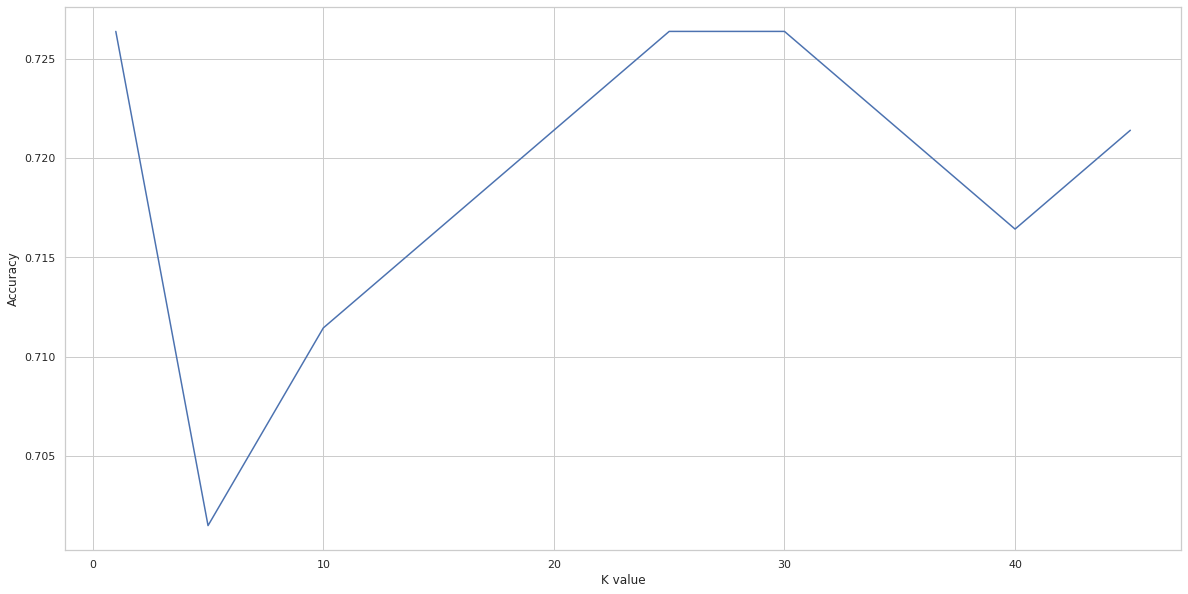

In [31]:
#Using KNN method on high wage growth. 

#One-hot encoding of school region and school type We expect 10 new variables to be added 1 for each school reagion (5) and 1 for each school type (5)
Encoded_df=pd.get_dummies(df_type_region,columns=["Region","School Type"])

#getting the differnce for each university mid-career median minus starting median salary
diff = df_type_region["Mid_region"] - df_type_region["Starting_region"]

#getting the median difference 
median=st.median(diff)


#array to hold the catergorical variable "good" wage growth
y_bestGrowth = np.zeros(len(diff))

#assigning each universtiy with 1 for good wage growth and 0 for below wage growth 
for i,val in enumerate(diff):
    if val > median:
        y_bestGrowth[i] = 1
    else:
        y_bestGrowth[i] = 0

        
#using kNN to predict the best wage growth     
Encoded_df["Best Growth"] = y_bestGrowth

#Testing and training 

#We will be developing our model by using the variables Starting median salary, universtiy region and type 
X_train, X_test, y_train, y_test=train_test_split(Encoded_df[['Starting_region',"Region_California","Region_Midwestern","Region_Northeastern","Region_Southern","Region_Western","School Type_Engineering","School Type_Ivy League","School Type_Liberal Arts","School Type_Party","School Type_State"]], Encoded_df["Best Growth"], random_state=1, test_size=0.75)
#X_train, X_test, y_train, y_test=train_test_split(Encoded_df[['Starting_region',"Mid_region",),Encoded_df["Best Growth"], random_state=1, test_size=0.75))
#X_train, X_test, y_train, y_test=train_test_split(Encoded_df[["School Type_Engineering","School Type_Ivy League","School Type_Liberal Arts","School Type_Party","School Type_State"]], Encoded_df["Best Growth"], random_state=1, test_size=0.75)



#testing with diffrent K values 
k_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 45])


#k-Nearest Kneighbors method: Testing with diffrent k values 

#Average accuracy for diffrent k values
aveAccuracies = np.zeros(len(k_neighbors))

for i, val in enumerate(k_neighbors):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(X_train,y_train)
    scores = cross_val_score(estimator=model,X=X_test,y=y_test,cv=3,scoring='accuracy')
    aveAccuracies[i] = scores.mean()
    print("Accuracy: "+str(aveAccuracies[i]) + " k value: "+ str(val))
    
plt.plot(k_neighbors,aveAccuracies)  
plt.xlabel("K value");
plt.ylabel("Accuracy");


#checking results k=25
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))




Since we were trying to predict "good" mid-career wage growth, we were limited in the number of features we could train the model on. Since we used the mid-career salary minus starting career salary to calculate the difference, we were not surprised when we trained the model on both mid-career and starting salary, the model's accuracy was 98% (because the difference only depends on those variables). 

Instead, we wanted to see if starting salary amount, university region, and university type played a role in salary growth to mid-career. When we split our data into test and training, our  "X_train" variable in the code is an 11 by 268*.75 matrix (75% of our data was split into training)  where the first column is the starting median salary for each university, the next five columns are the one-hot encoding for each of the five university regions and the last five columns are the one-hot encoding for each of the five university types. Our y_test (the variable we wish to predict) is a binary array where we determine if that specific university has "good" wage mid-career wage growth. 


Results: We tested our model with different values of parameter k (k ranged from 1 to 45). We found there to be a three way tie between k values=1,25,30 with an accuracy of 0.726. This tells us that there is some association between university starting salary, university region, and university school type, but that association is really weak (only .72 percent of the time it predicted correctly). The model might do be better if each had the data sperated by major for each university instead of grouping them all into one stat. 

Next we will try to predict university region and type by training our model on the 5 salary variables and try to determine if there is a relationship between salary (starting and mid-career) with university type and region. 

## K-NN Predicting Region (Training with Starting Salary and Mid-Career 25,50,75 Percentile variables) 

In this next section we try to develop a K-NN model to try and predict university region. This will let us understand the relationship between wages and university region. 

For this section we chose to do integer-encoding for the region where {'California':0,'Midwestern':1,'Northeastern':2,'Southern':3,'Western':4} and for our training, we again split our data into a test and training set where for our "X_Train" variable, it will be a 4 by 268*.75 matrix where the first column is the Starting Median Salary variable and the next three are the 25th, 50th, and 75th percentile. We will also attempt to find the optimal k parameter and compute the confustion matrix for it. 

Accuracy: 0.35323383084577115 k value: 1
Accuracy: 0.36318407960199 k value: 5
Accuracy: 0.2835820895522388 k value: 10
Accuracy: 0.3283582089552239 k value: 25
Accuracy: 0.3233830845771144 k value: 30
Accuracy: 0.34825870646766166 k value: 35
Accuracy: 0.3582089552238806 k value: 40
Accuracy: 0.38308457711442784 k value: 45
Confusion Matrix:
[[ 0  0 18  0  1]
 [ 0  0 43  0  8]
 [ 0  0 47  0  2]
 [ 0  0 48  0  6]
 [ 0  0 25  0  3]]


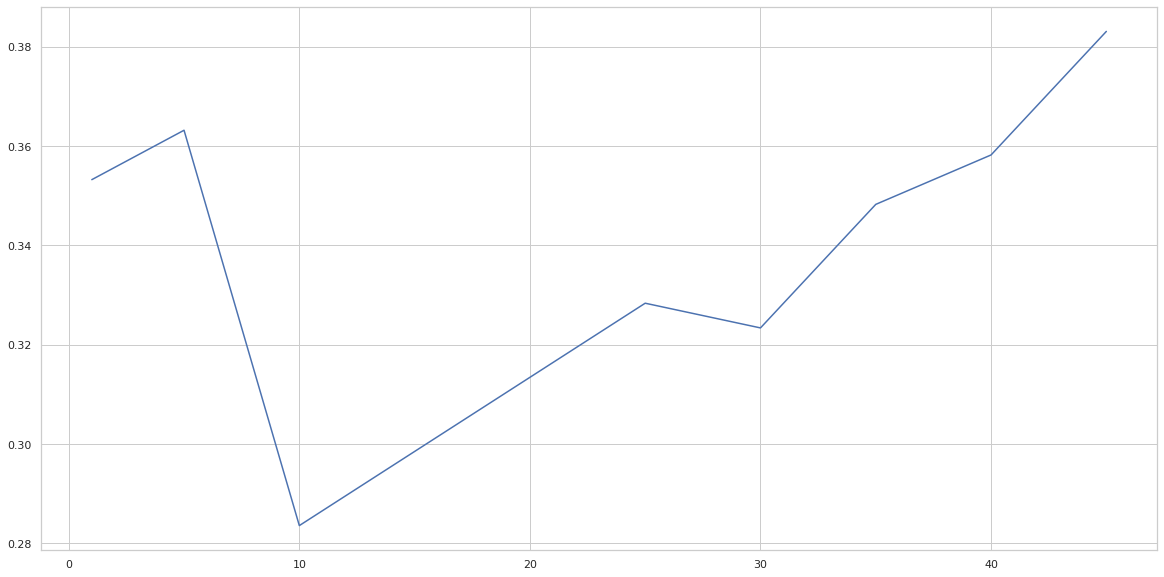

In [32]:
#K-NN Classificaiton 

df_type_region

#Integer Encoding 
df_regionEncoding=df_type_region.replace({'California':0,'Midwestern':1,'Northeastern':2,'Southern':3,'Western':4})
#df_regionEncoding=df_type_region.replace({'Engineering':0,'State':1,'Liberal Arts':2,'Party':3,'Ivy League':4})


#splitting data into testing and training sets
X_train, X_test, y_train, y_test=train_test_split(df_regionEncoding[['Starting_region','Mid_region','Mid_25th_region','Mid_75th_region']], df_regionEncoding["Region"], random_state=1, test_size=0.75)




#testing with diffrent K values 
k_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 45])


#k-Nearest Kneighbors method: Testing with diffrent k values 

#Average accuracy for diffrent k values
aveAccuracies = np.zeros(len(k_neighbors))

for i, val in enumerate(k_neighbors):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(X_train,y_train)
    scores = cross_val_score(estimator=model,X=X_test,y=y_test,cv=3,scoring='accuracy')
    aveAccuracies[i] = scores.mean()
    print("Accuracy: "+str(aveAccuracies[i]) + " k value: "+ str(val))
    
plt.plot(k_neighbors,aveAccuracies)    

#checking results k=45
model = KNeighborsClassifier(n_neighbors = 45)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))






We found k=45 produced the best accuracy for our model. The best accuracy was slightly less than 40%. Our model had difficulty predicting the correct region given the starting median salary and the three percentile mid-career salaries for each university. This does fall in line with what we saw when we plotted the scatter plot by university region. In that plot, we noticed that the university regions "blended" together, and it was difficult to see if certain regions made up specific areas in that plot. From our K-NN model, we see that salaries and regions don't have a strong relationship with each other. 


Next we will try to build a K-NN and try to predict university type (from the scatter plot we did by type, there was a noticeable difference between each university type). We might hypothesize that a model built for predicting university type will fare better than region. 

## K-NN Predicting University Type (Training with Starting Salary and Mid-Career 25,50,75 Percentile variables)

In this next section we try to develop a K-NN model to try and predict university type. This will let us understand the relationship between wages and university type.

For this section we chose to do integer-encoding for the school type where {'Engineering':0,'State':1,'Liberal Arts':2,'Party':3,'Ivy League':4}
and for our training, we again split our data into a test and training set where our "X_Train" variable will be a 4 by 268*.75 matrix where the first column is the Starting Median Salary variable and the next three are the 25th, 50th, and 75th percentile. We will also attempt to find optimal k parameter and compute the confusion matrix for it.

Accuracy: 0.7064676616915424 k value: 1
Accuracy: 0.7810945273631841 k value: 5
Accuracy: 0.7711442786069652 k value: 10
Accuracy: 0.7164179104477612 k value: 25
Accuracy: 0.7064676616915423 k value: 30
Accuracy: 0.7014925373134329 k value: 35
Accuracy: 0.6965174129353233 k value: 40
Accuracy: 0.6915422885572139 k value: 45
Confusion Matrix:
[[  2   3   8   0   0]
 [  1 131   6   0   0]
 [  0  18  12   0   0]
 [  0  15   0   0   0]
 [  3   0   2   0   0]]


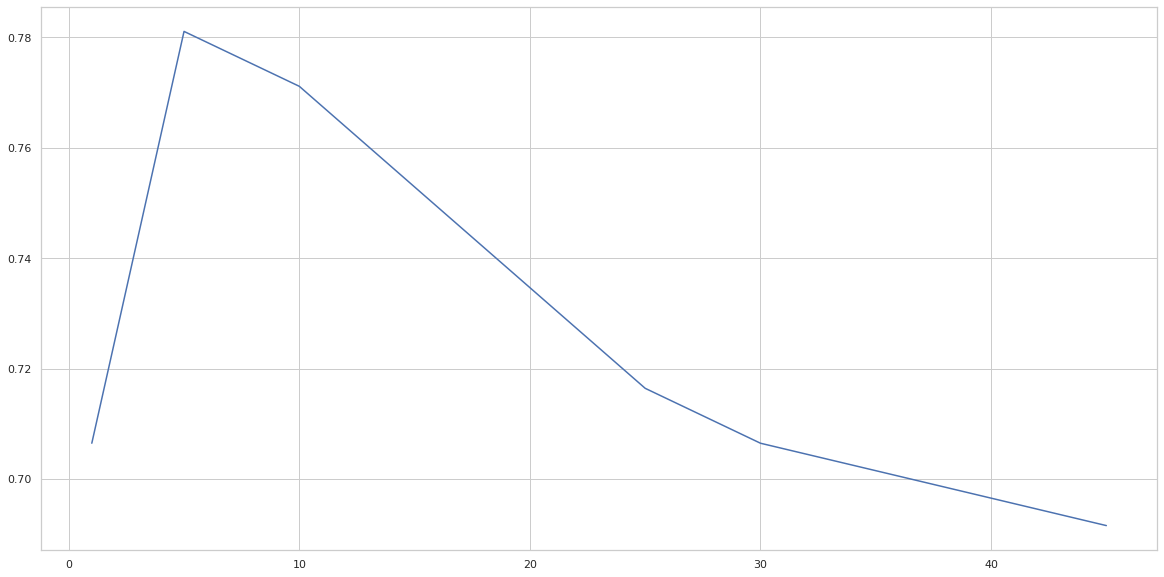

In [33]:
#K-NN Classificaiton 

df_type_region

#Integer Encoding 
#df_regionEncoding=df_type_region.replace({'California':0,'Midwestern':1,'Northeastern':2,'Southern':3,'Western':4})
df_regionEncoding=df_type_region.replace({'Engineering':0,'State':1,'Liberal Arts':2,'Party':3,'Ivy League':4})


#splitting data into testing and training sets
X_train, X_test, y_train, y_test=train_test_split(df_regionEncoding[['Starting_region','Mid_region','Mid_25th_region','Mid_75th_region']], df_regionEncoding["School Type"], random_state=1, test_size=0.75)




#testing with diffrent K values 
k_neighbors = np.array([1, 5, 10, 25, 30, 35, 40, 45])


#k-Nearest Kneighbors method: Testing with diffrent k values 

#Average accuracy for diffrent k values
aveAccuracies = np.zeros(len(k_neighbors))

for i, val in enumerate(k_neighbors):
    model = KNeighborsClassifier(n_neighbors = val)
    model.fit(X_train,y_train)
    scores = cross_val_score(estimator=model,X=X_test,y=y_test,cv=3,scoring='accuracy')
    aveAccuracies[i] = scores.mean()
    print("Accuracy: "+str(aveAccuracies[i]) + " k value: "+ str(val))
    
plt.plot(k_neighbors,aveAccuracies)   



#checking results k=5
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))



We found k=5 produced the best accuracy for our model. The best accuracy was slightly less than 80%. Our model for predicting school type did considerably better than the model predicting by region. 78% is not perfect. There are some issues with the model. According to the confusion matrix, the biggest mistake (18 misidentifications) was misdetermining a school to be of type liberal arts when it should have been of type state. These findings confirm what we saw in the scatter plots where university types tended to be more closer distributed. We are gaining more evidence that the university type plays a bigger role in determining wages than university region.

Next we will attempt to do some clustering to better understand how big of a role university region and type play in determining a student's post university wages.

## Kmodes Clustering: Group Universities to Help Decision

This is the last section for the school type and region dataset. We are planning to use clustering to help readers to find similar schools. This section is a 'Recommended page' for readers. We respect everyone's preference, so we added this section to help you make your own decision.

In this section, we will use Kmodes to find the best number for groups. The columns for training are *\"Starting Salary", "Region", "School Type", "Mid-career Salary\"*. To be clear, since we only consider these four variables, our suggestions will only be based on these variables. For example, if you want to find a similar school in a group, those schools are just similar in *\"Starting Salary","Region", "School Type", "Mid-career Salary\"* aspects, they may not be similar in others aspects. 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 815.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 815.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 815.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 815.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 815.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, 

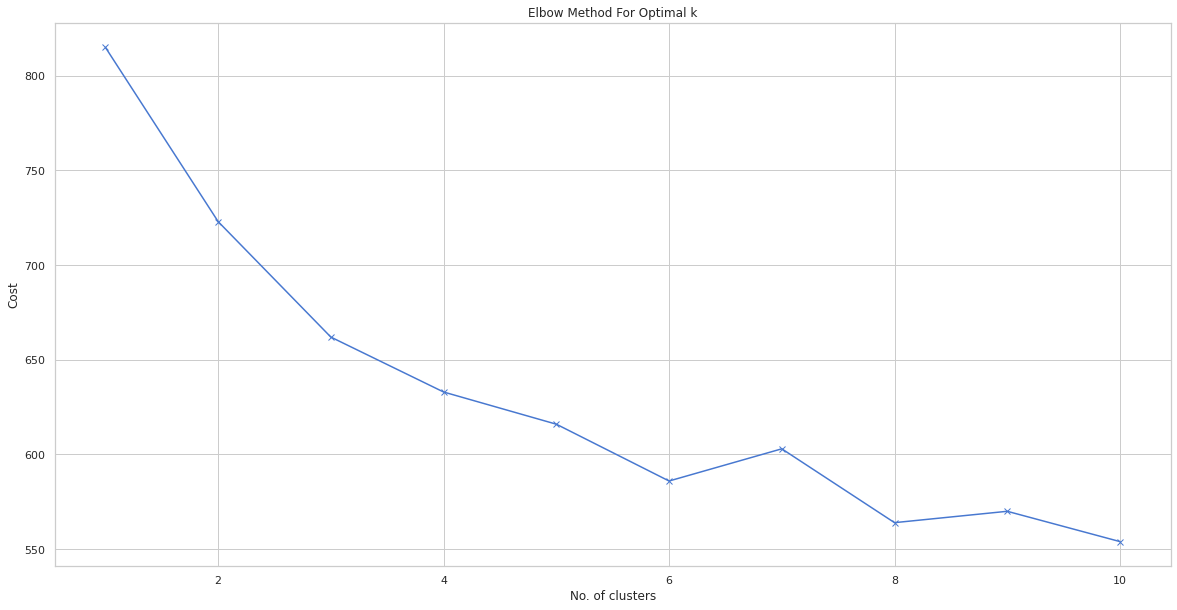

In [34]:
#Kmodes clustering 

X = df_type_region[["Starting_region","Region", 'School Type', 'Mid_region']]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

#y_pred = KMeans(n_clusters=10, n_init=1, init='random', max_iter=1).fit_predict(X)
#plt.scatter(df_regionEncoding["Region"],df_regionEncoding["diff"], c=y_pred, cmap=cmap);

ks = range(1,11)
scores = []

#fig, axs = plt.subplots(2,5, figsize=(20, 8))

for k in ks:
    model = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    y_pred = model.fit_predict(X)
    scores.append(model.cost_)

#     subplot = axs[int((k-1)/5)][(k-1)%5]
#     subplot.scatter(df_type_region["Region"], df_type_region["Starting_region"], c=y_pred,  marker="o", cmap=cmap, s=7);
#     subplot.set_title("k="+str(k))

    
# fig = plt.figure(figsize=(14, 8))
# plt.plot(ks, scores)
# plt.ylabel('total intra-cluster distance')
# plt.xlabel('k')
# plt.show()
plt.plot(ks, scores, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

This plot tells us that the best group number is 5 or 6 because the curve goes smoothly since 5. And we decide to divide the whole dataset into 5 groups.

In [35]:
# when k = 5
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 629.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29, cost: 624.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 23, cost: 623.0
Run 3, iteration: 2/100, moves: 3, cost: 623.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 29, cost: 600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 70, cost: 618.0
Run 5, iteration: 2/100, moves: 24, cost: 618.0
Best run was number 4


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0,
       4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0,
       0, 0, 0, 0], dtype=uint16)

In [36]:
df_type_region["Cluster"] = clusters
df_type_region.head()

,University,Region,School Type,Starting_region,Mid_region,Mid_10th_region,Mid_25th_region,Mid_75th_region,Mid_90th_region,Cluster
0,California Institute of Technology (CIT),California,Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN,2
1,Harvey Mudd College,California,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN,2
2,"University of California, Berkeley",California,State,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,2
3,Occidental College,California,Liberal Arts,51900.0,105000.0,NaN,54800.0,157000.0,NaN,2
4,Cal Poly San Luis Obispo,California,State,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,2


Until now, we get a new dataset which is aleady grouped by 5. 

In [37]:
# print all university

group1 = df_type_region.loc[df_type_region["Cluster"] == 0]
group2 = df_type_region.loc[df_type_region["Cluster"] == 1]
group3 = df_type_region.loc[df_type_region["Cluster"] == 2]
group4 = df_type_region.loc[df_type_region["Cluster"] == 3]
group5 = df_type_region.loc[df_type_region["Cluster"] == 4]

Cluster_list = [group1, group2, group3, group4, group5]

for i in range(5):
    group = Cluster_list[i]
    print(f'Group_{i+1}: {group["University"]}')

Group_1: 25                           Humboldt State University
98                                    Grinnell College
130                    Georgia Institute of Technology
131                      Washington and Lee University
132                                   Davidson College
                            ...                       
263                            Fitchburg State College
264                                University Of Maine
265     State University of New York (SUNY) at Potsdam
266    State University of New York (SUNY) at Fredonia
267                       University of Southern Maine
Name: University, Length: 95, dtype: object
Group_2: 27                             Colorado School of Mines
28               University of Colorado - Boulder (UCB)
29    New Mexico Institute of Mining and Technology ...
30                                University of Arizona
31                        University of Washington (UW)
32                    Washington State University (WS

### Sub-conclusion 1

In this list, we print out every university by group. You can check any school you like in this list and you also can find out the similar schools in each group.

In the next part, we will do some visualizations for each group. We believe it will help readers to understand faster if they can visualize the features of each group.

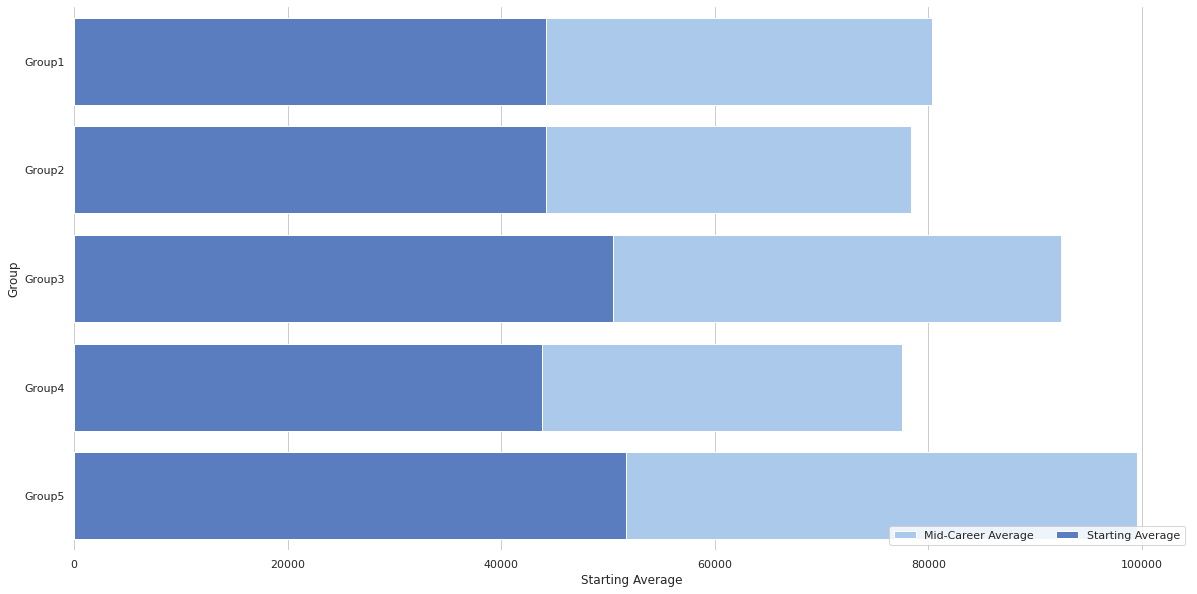

In [38]:
# barplot for each group
cluster_list = []

for i in range(5):
    group = df_type_region.loc[df_type_region["Cluster"] == i]
    cluster_list.append(group)

start_aver = []
mid_aver = []

for i in range(5):
    average = cluster_list[i]['Starting_region'].mean()
    average2 = cluster_list[i]['Mid_region'].mean()
    start_aver.append(average)
    mid_aver.append(average2)
    
data = {'Group':['Group1', 'Group2', 'Group3', 'Group4', 'Group5'],
        'Starting Average': start_aver, 'Mid-Career Average': mid_aver}

aver_df = pd.DataFrame(data)

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax2 = plt.subplots(figsize=(20, 10))


sns.set_color_codes("pastel")
#plotting Major vs Mid-career median salary
sns.barplot(y=aver_df["Group"], x="Mid-Career Average", data=aver_df,label="Mid-Career Average", color="b")

sns.set_color_codes("muted")
sns.barplot(y=aver_df["Group"], x="Starting Average", data=aver_df,label="Starting Average", color="b")

# Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


### Sub-conclusion 2

This sub-conclusion is different from others because we want to guide you how to read this plot for your decision.

1. This plot is showing average salaries between each group. So, if you care about salary, you cannot miss this plot. It tells you which group has a higher salary.

2. If you want to choose a university that might have a higher salary, then you can consider **Group 1** and try to avoid universities in Group 4.

3. If you don't care about salary, you can keep reading the next plot that we made for you.

<AxesSubplot:xlabel='School_Type'>

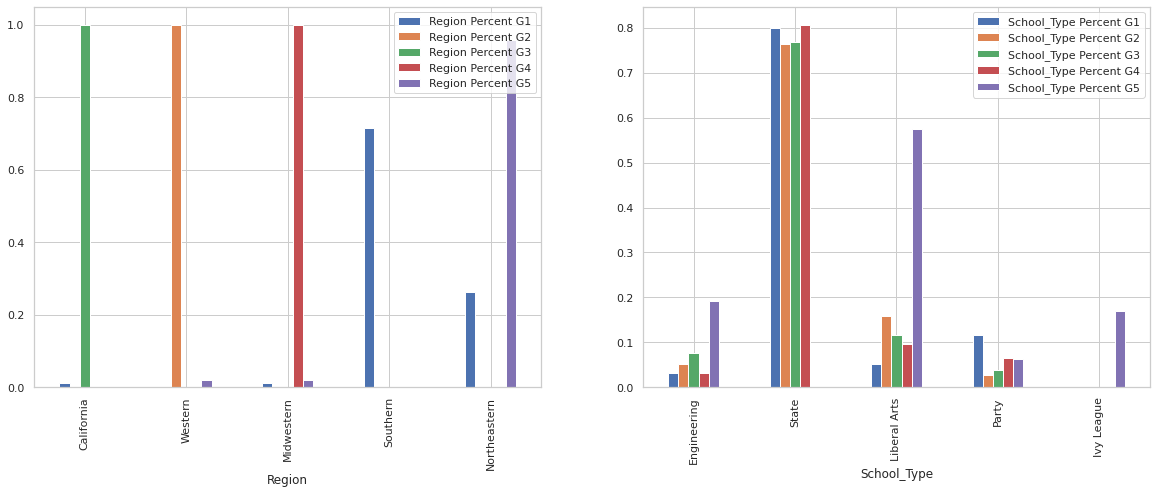

In [39]:
# clustering details

region = ['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']
school_type = ['Engineering', 'State', 'Liberal Arts', 'Party', 'Ivy League']

count_ls = []
type_count_ls = []

for k in range(5):
    count = []
    percent = []
    for i in range(5):
        region_count = len(cluster_list[k].loc[cluster_list[k]["Region"] == region[i]])
        count.append(region_count)

        tol = len(cluster_list[k]["Region"])

        rate = region_count / tol
        percent.append(rate)
    
    count_ls.append(percent)
    
for k in range(5):
    type_count = []
    percent_type = []
    for i in range(5):
        ty_count = len(cluster_list[k].loc[cluster_list[k]["School Type"] == school_type[i]])
        type_count.append(ty_count)

        tol = len(cluster_list[k]["School Type"])

        rate = ty_count / tol
        percent_type.append(rate)
        
    type_count_ls.append(percent_type)


data = {'Region':region, 'School_Type': school_type,
        'Region Percent G1': count_ls[0], 'School_Type Percent G1': type_count_ls[0],
       'Region Percent G2': count_ls[1], 'School_Type Percent G2': type_count_ls[1],
       'Region Percent G3': count_ls[2], 'School_Type Percent G3': type_count_ls[2],
       'Region Percent G4': count_ls[3], 'School_Type Percent G4': type_count_ls[3],
       'Region Percent G5': count_ls[4], 'School_Type Percent G5': type_count_ls[4],}
groups = pd.DataFrame(data)



f, ax2 = plt.subplots(1,2, figsize=(20, 7))

# sns.barplot(ax=ax2[0], x=groups['Region'], y=groups['Region Percent G2', 'Region Percent G1'])
# ax2[0].set_title('Region Rate')


# sns.barplot(ax=ax2[1], x=groups['School_Type'], y=groups['School_Type Percent'])
# ax2[1].set_title("School_Type Rate")
groups[["Region Percent G1",
        "Region Percent G2",
        "Region Percent G3",
        "Region Percent G4",
       'Region Percent G5', 'Region']].set_index('Region').plot(kind="bar",ax=ax2[0])


groups[["School_Type Percent G1",
        "School_Type Percent G2",
        "School_Type Percent G3",
        "School_Type Percent G4",
       'School_Type Percent G5', 'School_Type']].set_index('School_Type').plot(kind="bar",ax=ax2[1])





### Sub-conclusion 3

These two plots contain lots of information, so you may want to use them carefully. The right hand-side graph is showing the details info in region for each group.

1. Every bar in the graph is represented of the occupancy of universities' region in each group. For example, Group 2 has the highest occupancy in California, so if you prefer to apply universities in California, you may want to consider selecting schools in Group 2.

The left hand-side graph is showing the details info in school type for each group.

2. Every bar in the graph is represented of the occupancy of universities' type in each group. For example, if you prefer to apply for a party school, then you can consider selecting schools in Group 3 because they have a high rate of party schools. 

3. You can also combine the information from the two images. For example, if you are person who likes party schools and have a plan to study in California, then you can avoid the schools in Group 2 since there are few schools that match your preference. 

# Conclusion: University Region and Type

This last section was dedicated to the analysis of University regions and types. From our exploratory analysis, we found that universities by region are spread all over. There was nothing suggesting that some regions tended to have higher starting salaries or high mid-career salaries. All regions appeared to be "blended" with each other. For university by type, the scatter plot suggested that there were certain types of universities that tended to have higher starting salaries and higher mid-career salaries and other university types that tended to be on the lower end of the spectrum. For example, universities of type state tended to have lower starting salaries along with lower mid-career salaries (when compared to the rest). Also, ivy league and engineering type universities tended to have higher starting salaries and higher mid-career salaries. 

To explore the relationship between university region and type in-depth, we looked to apply a classification system (K-nearest neighbors) and clustering (kmode). For K-NN we applied it to predict three different categorical variables. The most significant model was able to predict university type (training only on starting median salary, mid-career 25,50,75 percentile median wages) with an accuracy of 80%. 

Clustering Conclusion ---insert here. 







# Project Summary


Project Overview: 

We evaluated three different datasets (one of them separately and 2 of them merged together). 
For the Major dataset, we did the exploratory analysis to understand our dataset and better prepare our methodology. 
We then did linear regression to understand the relationship between starting salary and mid-career salary growth. 

For our merged dataset, we did exploratory analysis to try and understand the role of university region and type it has on starting salary and mid-career salary. For our merged dataset, we did exploratory analysis to try and understand the role that university region and type has on starting salary and mid-career salary. We then applied a classification method (K-NN) to further understand the relationship region/type has on wages. We also applied a clustering method (kmodes). 

Project Objective:

Our main objective was to be able to provide upcoming university students a way of choosing which major and university to attend based on the outlook of high starting salary and high salary growth.  

Technical Contributions:



Main Results:

We found that the best majors (high starting salary and high mid-career salary) were Chemical Engineering, Computer Engineering, Electrical Engineering, Aerospace Engineering, Economics, CS, and Math. We found that only looking at a high starting salary does not indicate a high salary growth to mid-career. The more important variable to look at when choosing a major is salary growth. There were a few majors to avoid that had low starting salaries and low salary rates, but the majority of majors had decent salary growth. 

We also found that the university region does not play a significant role in determining salary starting amounts or salary growth rates. Thus students should not focus so much on schools based on where they are located but instead focus more on the type of university. Engineering universities and ivy league universities produced higher salaries, and state universities fared worse. 


Results Evaluated:




Future Directions:






